## House Sale Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### Reading and Understanding the Data

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all necessary libraries for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
 

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

#### Reading the data with keep_default_na=False as we see in the data dictionary that many of the categorical variables have NA as a value which might be dropped and considered as null by this dataset

In [4]:
housing = pd.read_csv("train.csv", keep_default_na=False)

In [5]:
housing.shape

(1460, 81)

##### The dataset has 1460 rows and 81 features

In [6]:
housing.head().append(housing.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NA,Attchd,1950,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1965,Fin,1,276,TA,TA,Y,736,6

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### Replacing NA with actual values for below features
- Alley: Type of alley access to property 
    - Grvl Gravel 
    - Pave Paved 
    - NA No alley access
- BsmtQual: Evaluates the height of the basement 
    - Ex Excellent (100+ inches) 
    - Gd Good (90-99 inches) 
    - TA Typical (80-89 inches) 
    - Fa Fair (70-79 inches) 
    - Po Poor (<70 inches 
    - NA No Basement
- BsmtCond: Evaluates the general condition of the basement 
    - Ex Excellent 
    - Gd Good 
    - TA Typical - slight dampness allowed 
    - Fa Fair - dampness or some cracking or settling 
    - Po Poor - Severe cracking, settling, or wetness 
    - NA No Basement
- BsmtExposure: Refers to walkout or garden level walls 
    - Gd Good Exposure 
    - Av Average Exposure (split levels or foyers typically score average or above) 
    - Mn Mimimum Exposure 
    - No No Exposure 
    - NA No Basement
- BsmtFinType1: Rating of basement finished area 
    - GLQ Good Living Quarters 
    - ALQ Average Living Quarters 
    - BLQ Below Average Living Quarters 
    - Rec Average Rec Room 
    - LwQ Low Quality 
    - Unf Unfinshed 
    - NA No Basement
- BsmtFinType2: Rating of basement finished area (if multiple types) 
    - GLQ Good Living Quarters 
    - ALQ Average Living Quarters 
    - BLQ Below Average Living Quarters 
    - Rec Average Rec Room 
    - LwQ Low Quality 
    - Unf Unfinshed 
    - NA No Basement
- FireplaceQu: Fireplace quality 
    - Ex Excellent - Exceptional Masonry Fireplace 
    - Gd Good - Masonry Fireplace in main level 
    - TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement 
    - Fa Fair - Prefabricated Fireplace in basement 
    - Po Poor - Ben Franklin Stove 
    - NA No Fireplace
- GarageType: Garage location 
    - 2Types More than one type of garage 
    - Attchd Attached to home 
    - Basment Basement Garage 
    - BuiltIn Built-In (Garage part of house - typically has room above garage) 
    - CarPort Car Port 
    - Detchd Detached from home 
    - NA No Garage
- GarageFinish: Interior finish of the garage 
    - Fin Finished 
    - RFn Rough Finished 
    - Unf Unfinished 
    - NA No Garage
- GarageQual: Garage quality 
    - Ex Excellent 
    - Gd Good 
    - TA Typical/Average 
    - Fa Fair 
    - Po Poor 
    - NA No Garage
- GarageCond: Garage condition 
    - Ex Excellent 
    - Gd Good 
    - TA Typical/Average 
    - Fa Fair 
    - Po Poor 
    - NA No Garage
- PoolQC: Pool quality 
    - Ex Excellent 
    - Gd Good 
    - TA Average/Typical 
    - Fa Fair 
    - NA No Pool
- Fence: Fence quality
    - GdPrv Good Privacy 
    - MnPrv Minimum Privacy 
    - GdWo Good Wood 
    - MnWw Minimum Wood/Wire 
    - NA No Fence
- MiscFeature: Miscellaneous feature not covered in other categories 
    - Elev Elevator 
    - Gar2 2nd Garage (if not described in garage section) 
    - Othr Other 
    - Shed Shed (over 100 SF) 
    - TenC Tennis Court
    - NA None

In [8]:
housing.Alley = housing.Alley.apply(lambda x: "NoAlley" if x == "NA" else x)
housing.BsmtQual = housing.BsmtQual.apply(lambda x: "NoBasement" if x == "NA" else x)
housing.BsmtCond = housing.BsmtCond.apply(lambda x: "NoBasement" if x == "NA" else x)
housing.BsmtExposure = housing.BsmtExposure.apply(lambda x: "NoBasement" if x == "NA" else x)
housing.BsmtFinType1 = housing.BsmtFinType1.apply(lambda x: "NoBasement" if x == "NA" else x)
housing.BsmtFinType2 = housing.BsmtFinType2.apply(lambda x: "NoBasement" if x == "NA" else x)
housing.FireplaceQu = housing.FireplaceQu.apply(lambda x: "NoFireplace" if x == "NA" else x)
housing.GarageType = housing.GarageType.apply(lambda x: "NoGarage" if x == "NA" else x)
housing.GarageFinish = housing.GarageFinish.apply(lambda x: "NoGarage" if x == "NA" else x)
housing.GarageQual = housing.GarageQual.apply(lambda x: "NoGarage" if x == "NA" else x)
housing.GarageCond = housing.GarageCond.apply(lambda x: "NoGarage" if x == "NA" else x)
housing.PoolQC = housing.PoolQC.apply(lambda x: "NoPool" if x == "NA" else x)
housing.Fence = housing.Fence.apply(lambda x: "NoFence" if x == "NA" else x)
housing.MiscFeature = housing.MiscFeature.apply(lambda x: "None" if x == "NA" else x)

#### For MasVnrType and Electrical replacing NA with mode of the respective columns.

In [9]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64

In [10]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

In [11]:
housing.MasVnrType = housing.MasVnrType.apply(lambda x: "None" if x == "NA" else x)
housing.Electrical = housing.Electrical.apply(lambda x: "SBrkr" if x == "NA" else x)

In [12]:
housing.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
housing.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### Looking at the data dictionary and the data, alongwith the info above we need to convert few columns from int to object and vice-versa
- MSSubClass, OverallQual, OverallCond should be converted to object from int64
- LotFrontage, MasVnrArea, GarageYrBlt should be converted to numeric data type from object

In [15]:
## Convert three columns to 'object' type as mentioned above
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [16]:
## Convert two columns to 'numeric' type as mentioned above
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')
housing['GarageYrBlt'] = pd.to_numeric(housing['GarageYrBlt'], errors='coerce')

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

##### Describe shows the statistics on all numerical columns

In [18]:
housing.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking for Null percentage in columns and rows

In [19]:
# percentage of missing values in each column
round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
Id                0.00
KitchenAbvGr      0.00
GarageType        0.00
FireplaceQu       0.00
Fireplaces        0.00
Functional        0.00
TotRmsAbvGrd      0.00
KitchenQual       0.00
BedroomAbvGr      0.00
GarageCars        0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
GarageFinish      0.00
GarageArea        0.00
Electrical        0.00
PoolQC            0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal           0.00
MiscFeature       0.00
Fence             0.00
PoolArea          0.00
GarageQual        0.00
ScreenPorch       0.00
3SsnPorch         0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
1stFlrSF          0.00
HeatingQC         0.00
CentralAir        0.00
LandSlope  

In [20]:
# row-wise null count percentage
round((housing.isnull().sum(axis=1)/len(housing))*100,2).sort_values(ascending=False)

287     0.14
529     0.14
307     0.14
375     0.14
234     0.14
        ... 
549     0.00
548     0.00
547     0.00
546     0.00
1459    0.00
Length: 1460, dtype: float64

#### The column null percentage is max for LotFrontage with 17%, for which we will impute the data. Not dropping any column based on this as the percentage is not that high for any column

#### Checking for duplicates and dropping the entire duplicate row if any

In [21]:
housing_dup = housing.copy()
housing_dup.drop_duplicates(subset=None, inplace=True)
housing_dup.shape

(1460, 81)

##### No full row duplicates in the dataset

### Pre-processing on the data - Data Cleaning and Preparation

##### Dropping column Id with all unique values which is used as identifier of the record.

In [22]:
housing = housing.drop(columns='Id')

In [23]:
housing.head().append(housing.tail())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000
1455,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NoPool,NoFence,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NoPool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NoPool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NoPool,NoFence,None,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Ga

#### Check the distribution of target variable

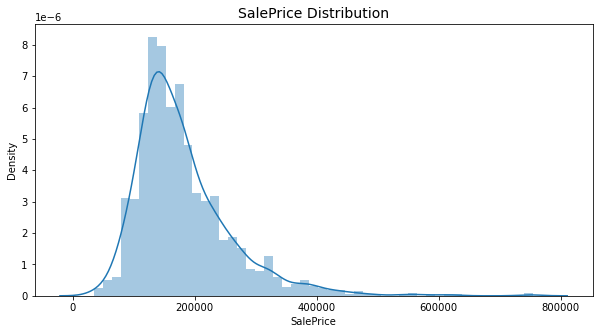

In [24]:
plt.figure(figsize=(10,5))
plt.title("SalePrice Distribution", fontdict={'fontsize': 14})
sns.distplot(housing["SalePrice"])
plt.show()

In [25]:
# Target variable is skewed so applying log transformation on it
housing['SalePrice'].skew()

1.8828757597682129

In [26]:
housing['SalePrice'] = np.log(housing['SalePrice'])

In [27]:
housing['SalePrice'].skew()

0.12133506220520406

In [28]:
# Displaying of all numerical features
numeric_features = housing.select_dtypes(include=[np.number])
numeric_features.shape

(1460, 34)

#### We have 34 categorical features in the dataset after dropping the Id column

In [29]:
# View of categorical variables details
categorical_features = housing.select_dtypes(exclude=[np.number])
categorical_features.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NoFireplace,Attchd,Unf,TA,TA,Y,NoPool,NoFence,None,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [30]:
categorical_features.shape

(1460, 46)

#### We have 46 categorical features in the dataset and we will check all the unique values for each categorical variable below

In [31]:
for col in categorical_features.columns:
    unique_values = housing[col].unique()
    print(f"{col} \t {unique_values}")

MSSubClass 	 [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning 	 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 	 ['Pave' 'Grvl']
Alley 	 ['NoAlley' 'Grvl' 'Pave']
LotShape 	 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 	 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 	 ['AllPub' 'NoSeWa']
LotConfig 	 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 	 ['Gtl' 'Mod' 'Sev']
Neighborhood 	 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 	 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 	 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 	 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 	 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual 	 [7 6 8 5 9 4 10 3 1 2]
OverallCond 	 [5 8 6 7 4 2 3 9 1]
RoofStyle 	 

### Visualization of data

#### Plotting the numerical features distplot and boxplot 

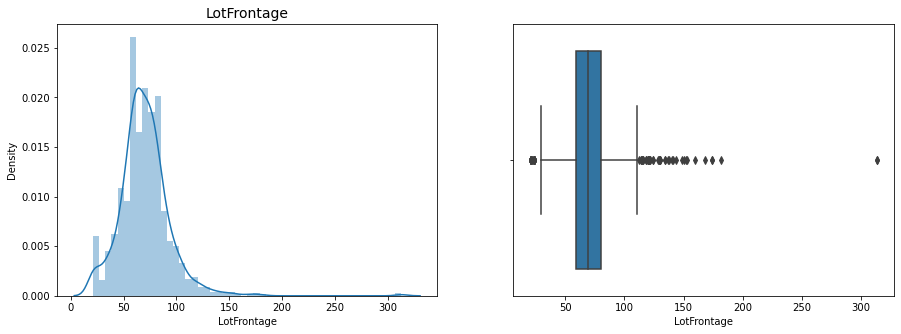

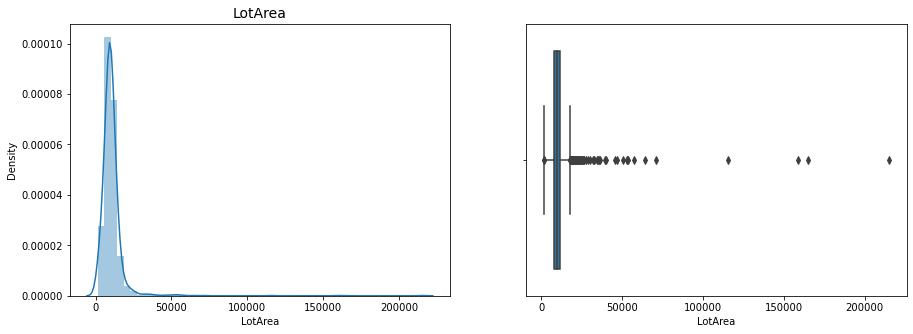

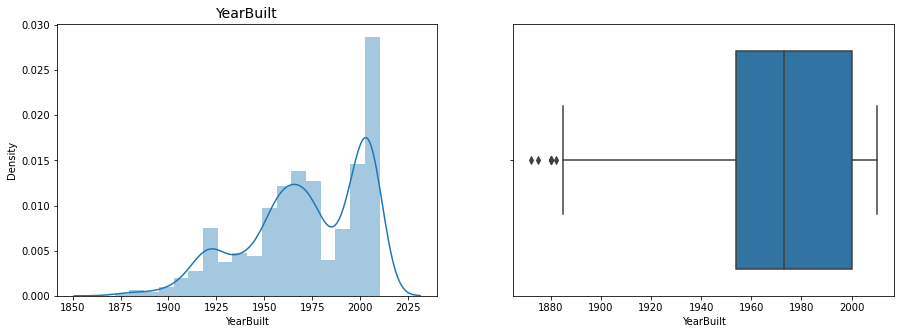

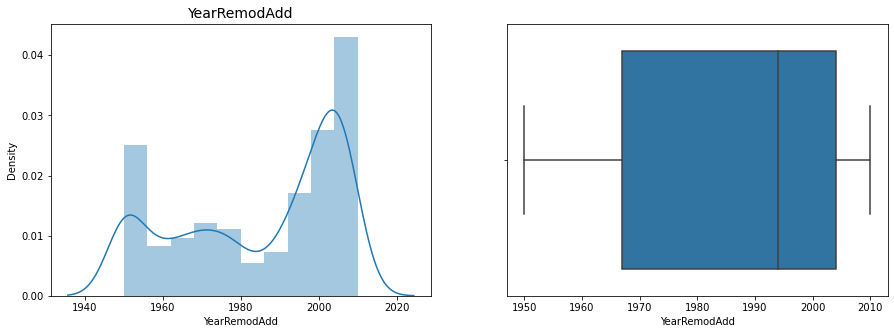

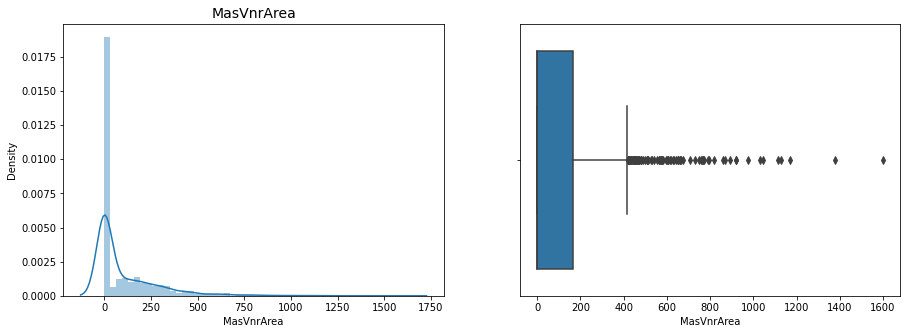

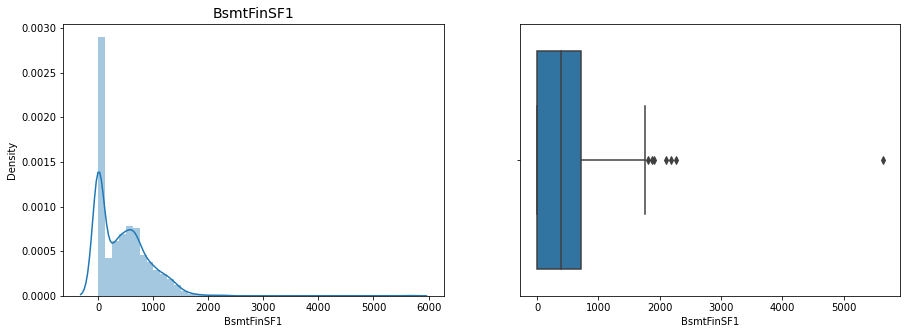

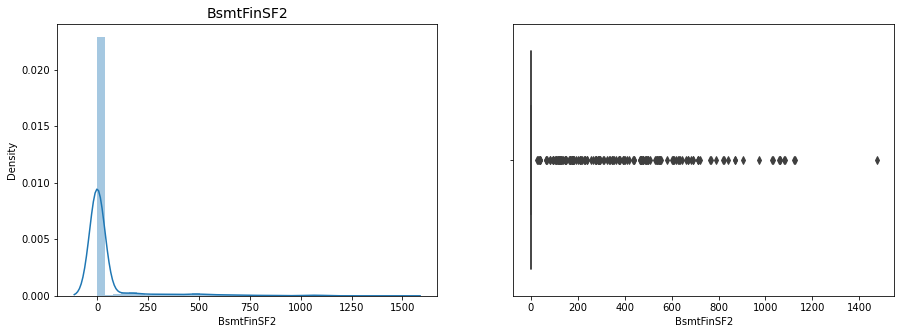

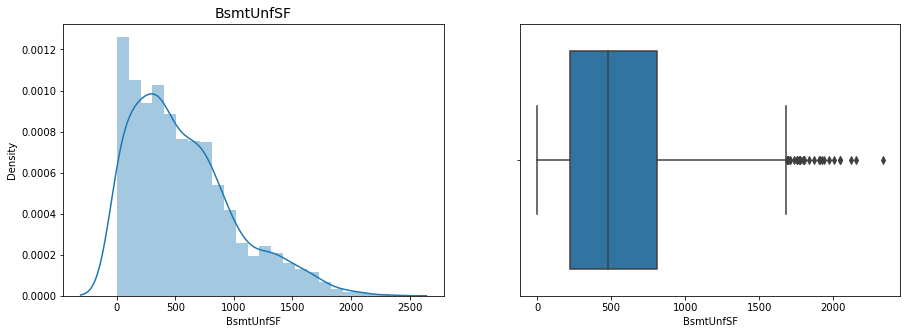

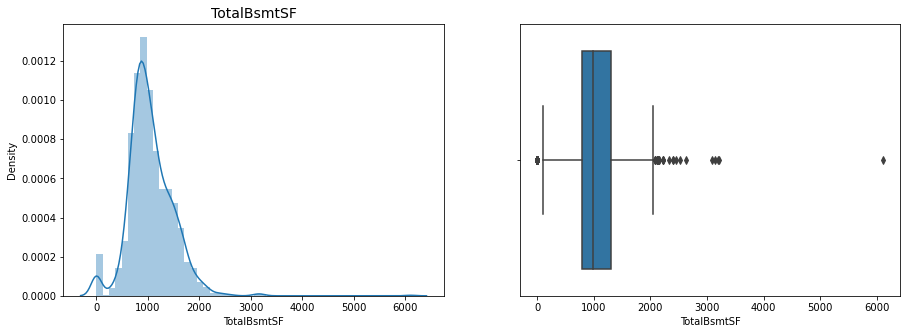

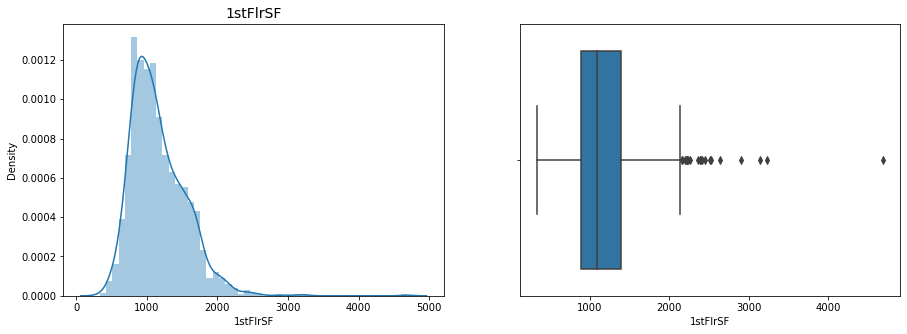

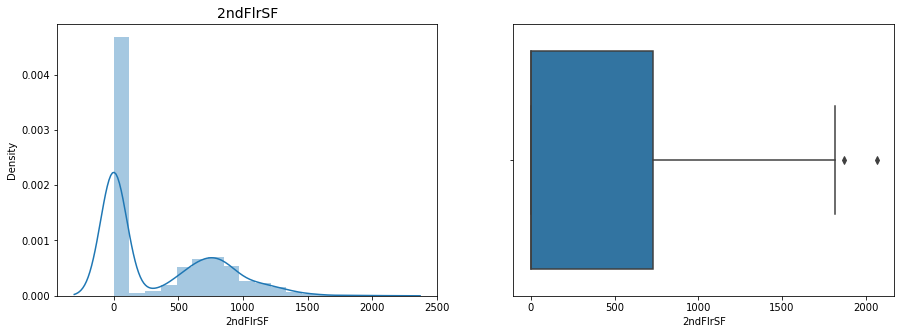

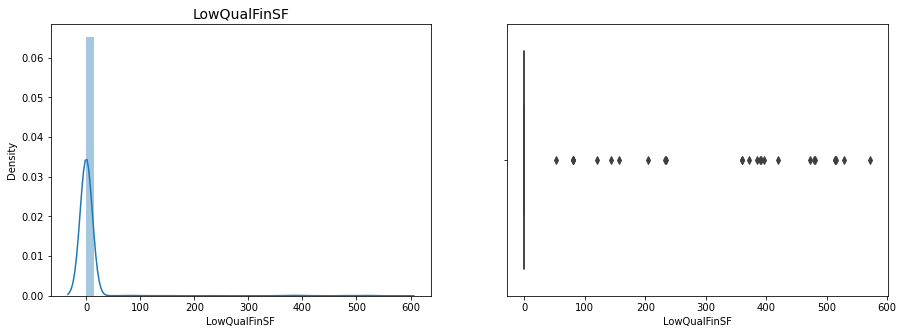

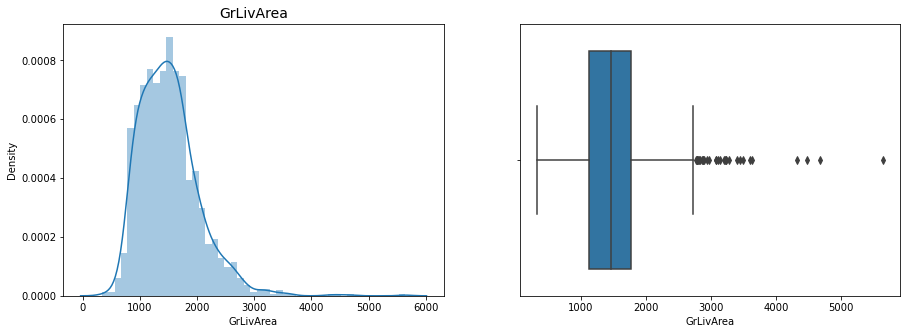

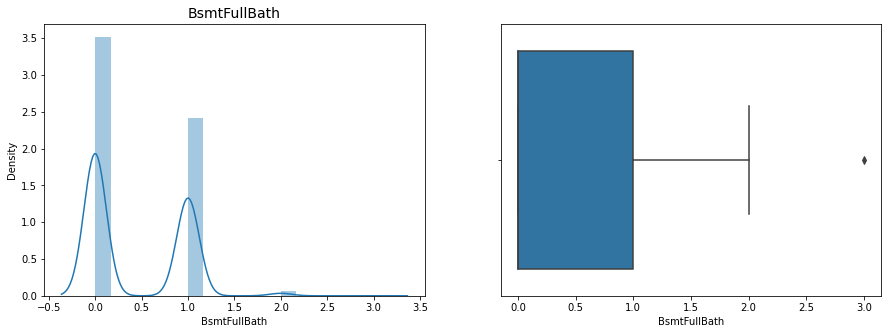

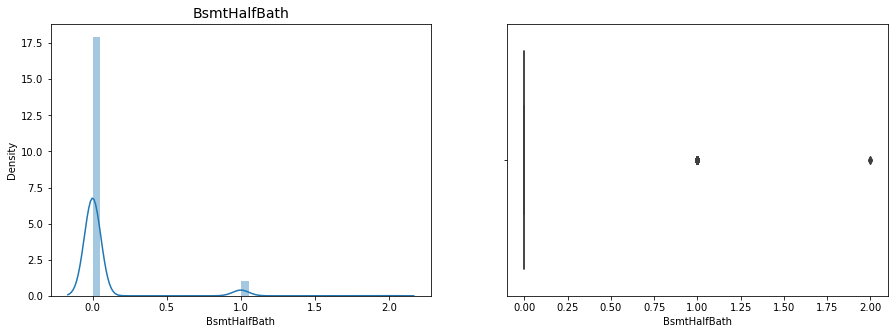

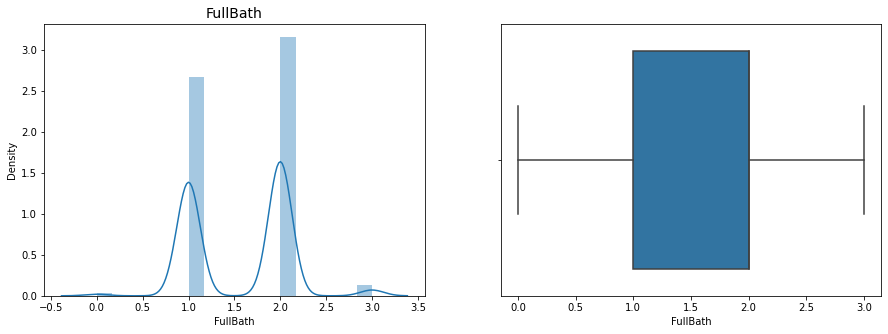

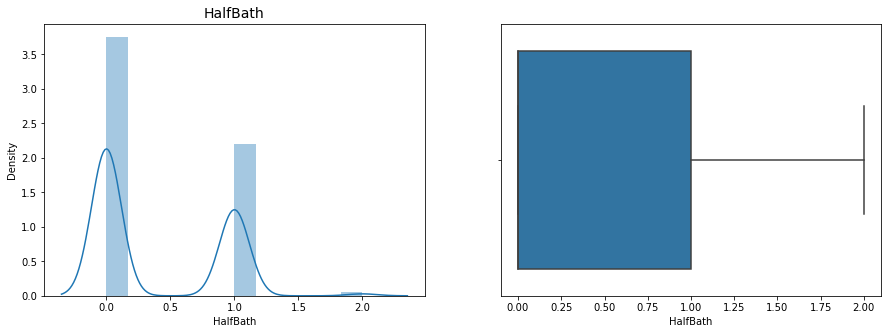

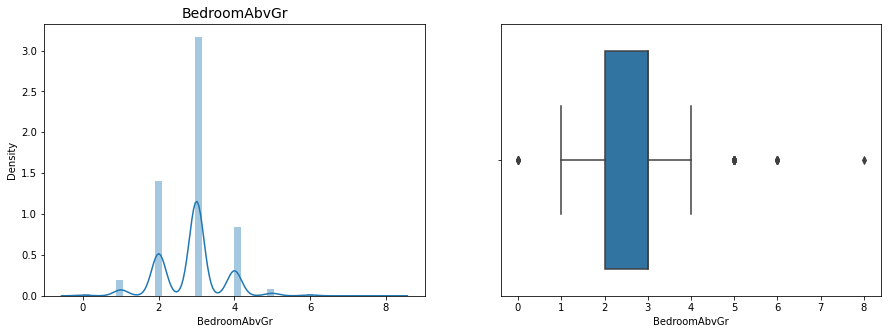

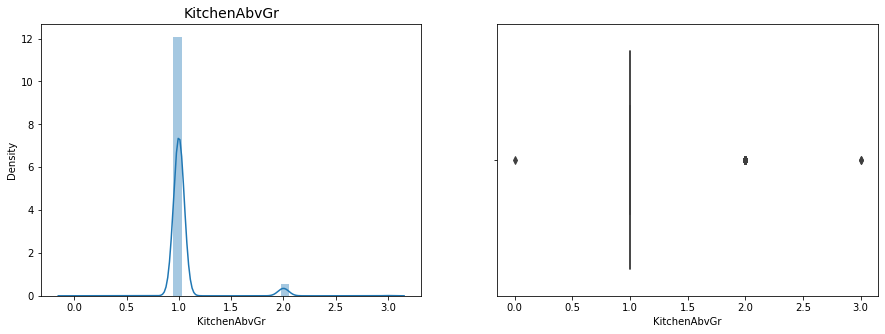

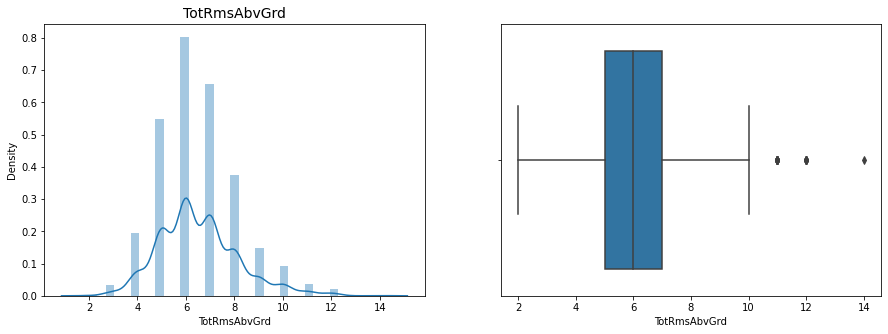

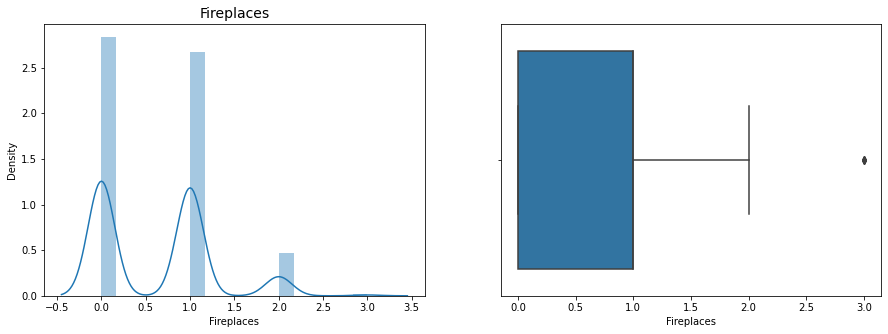

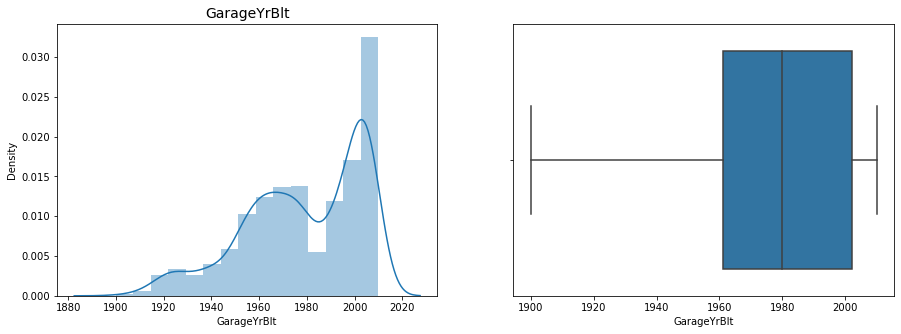

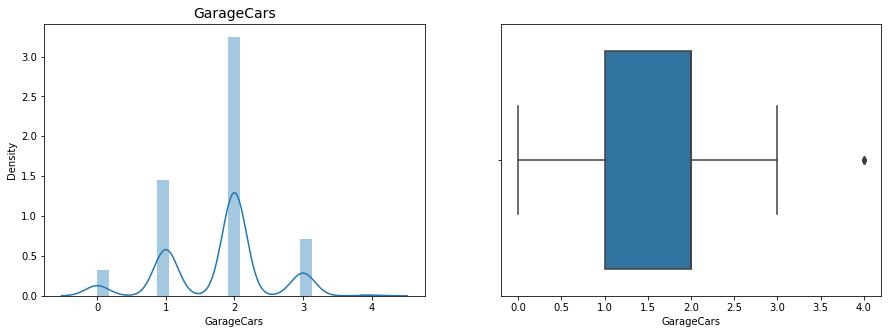

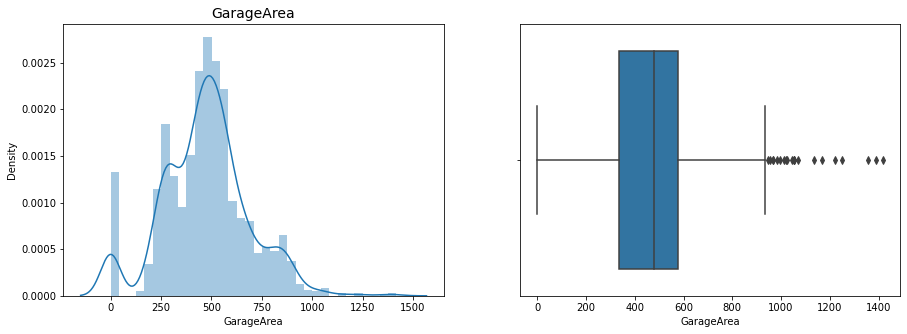

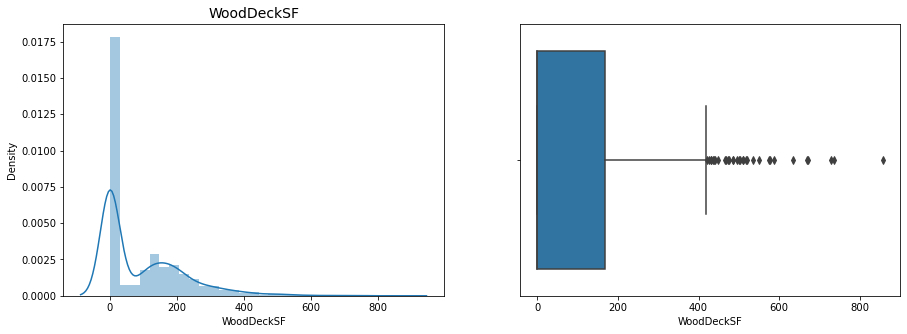

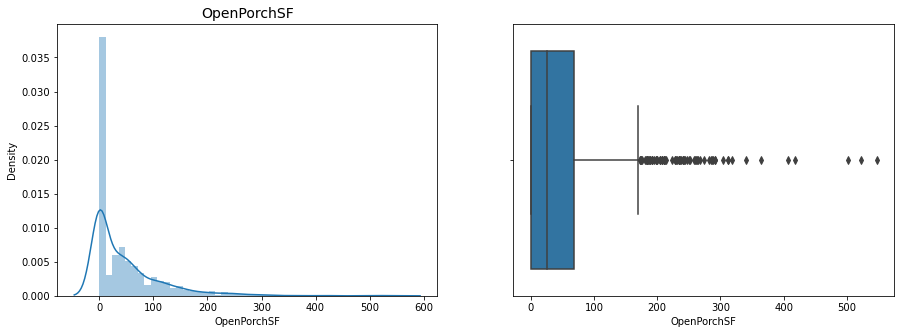

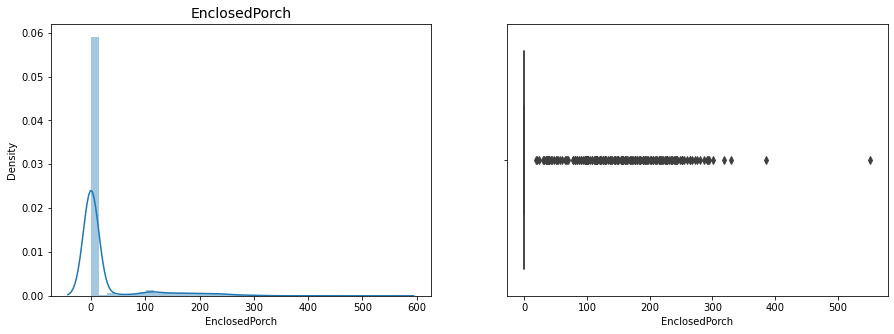

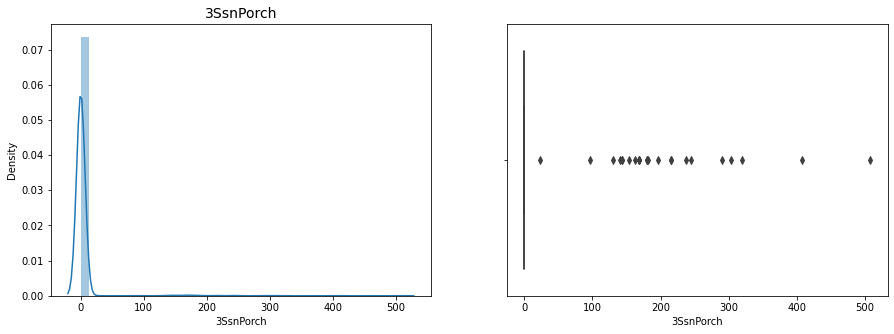

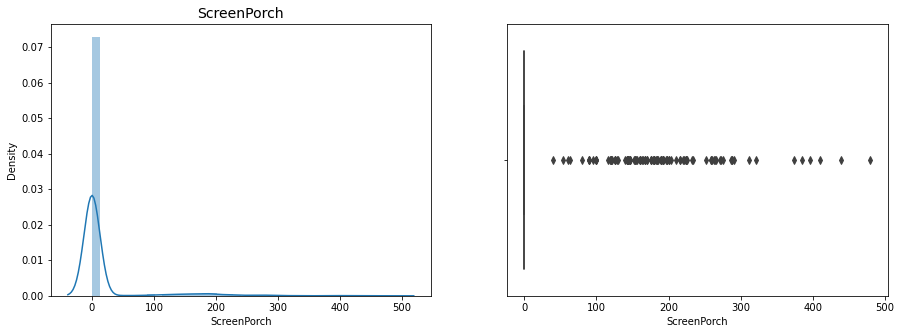

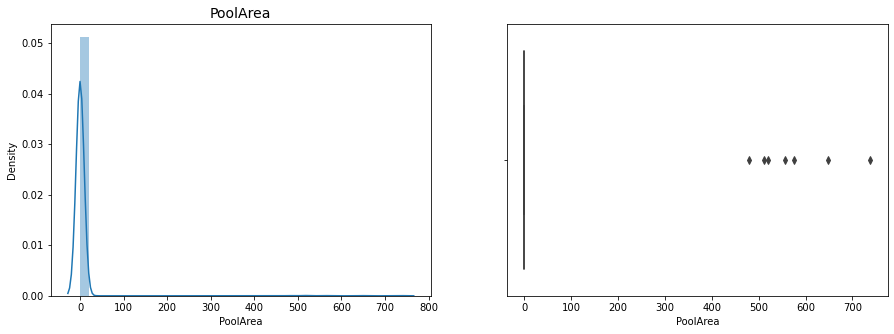

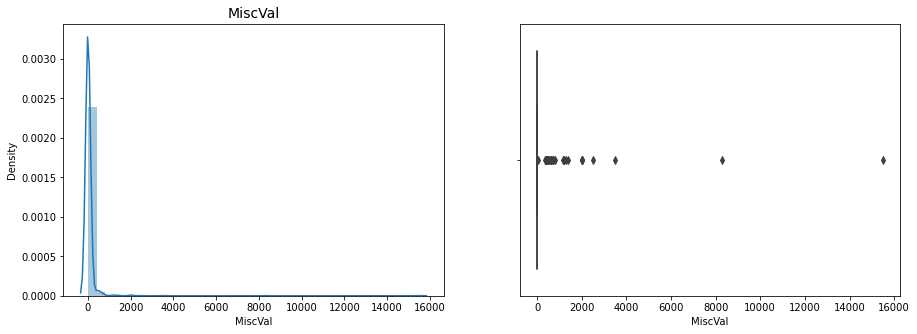

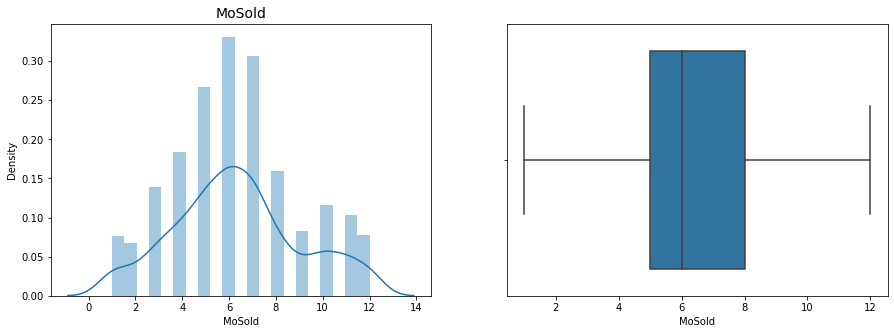

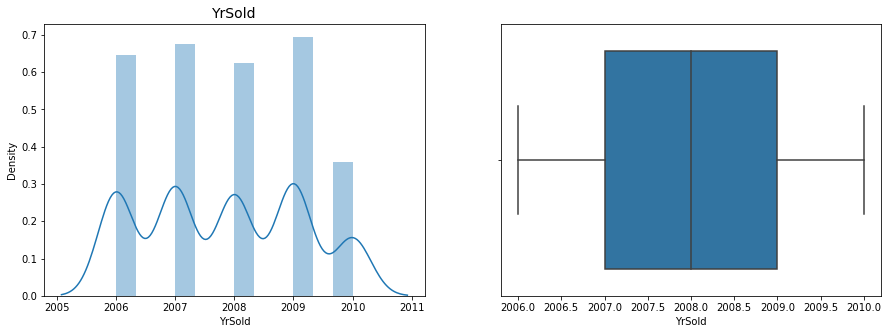

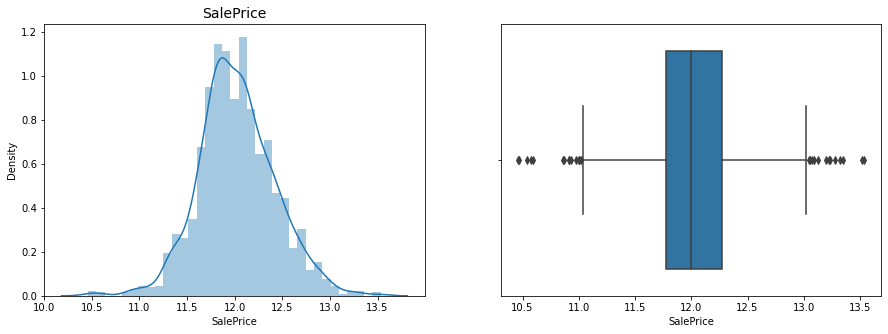

In [32]:
for col in numeric_features.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 14})
    sns.distplot(housing[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing[col])
    plt.show()    

#### We see that there are outliers in almost all the numerical variables including the target variable SalePrice which is right skewed

#### Plotting the categorical features barplot

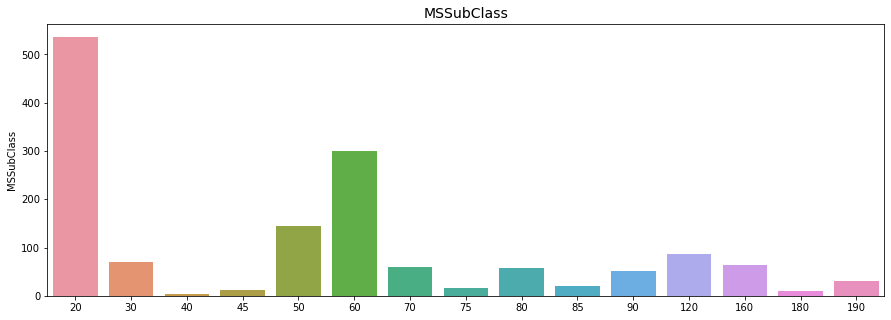

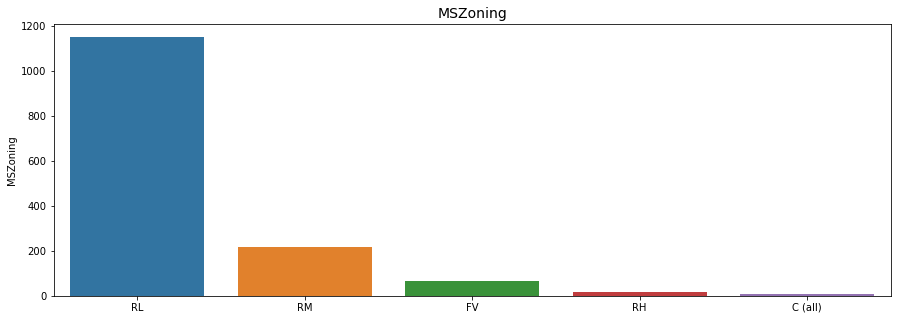

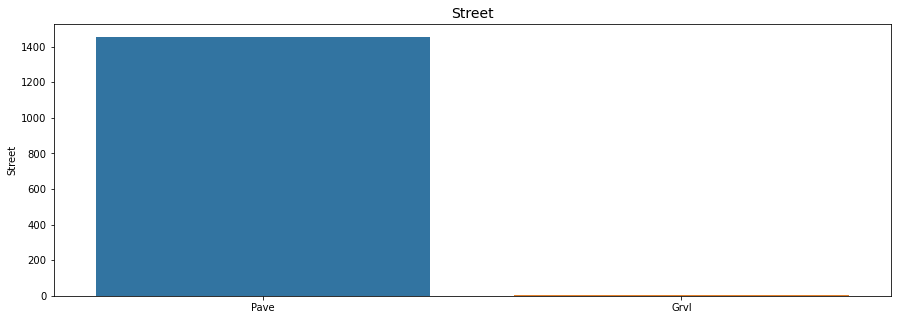

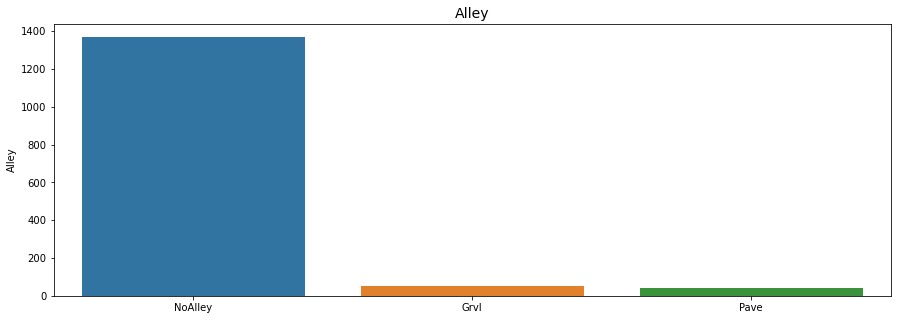

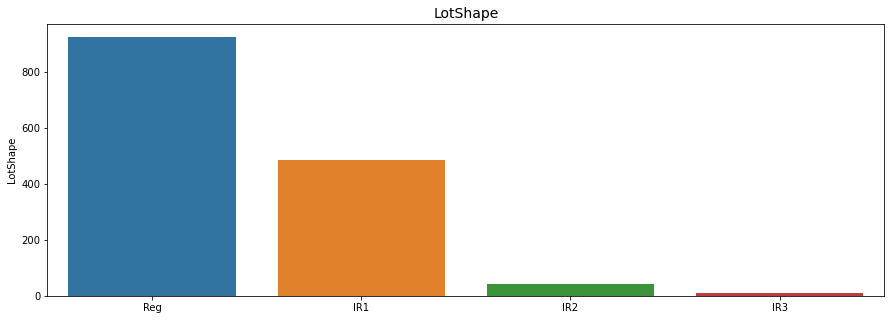

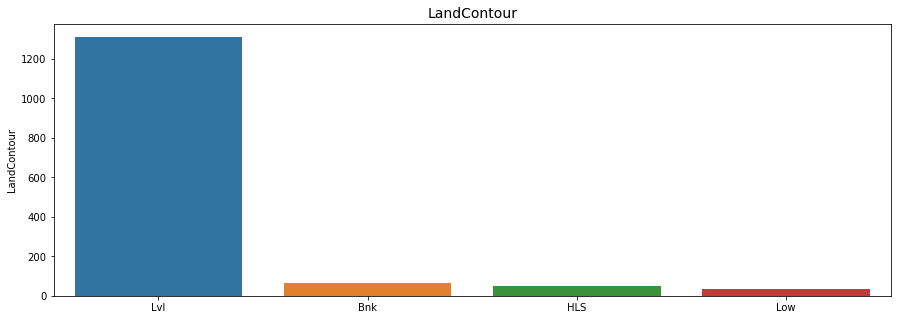

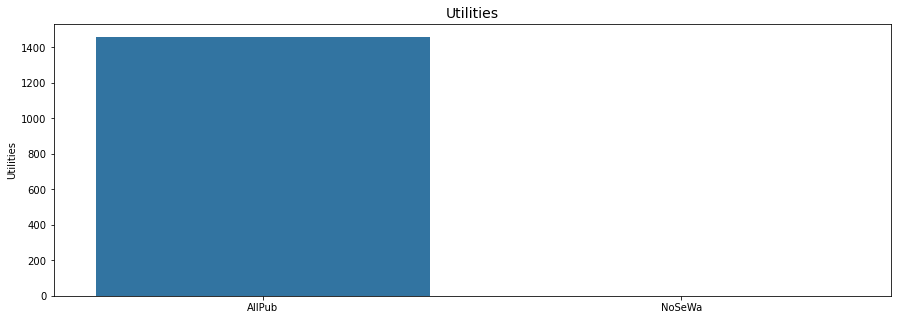

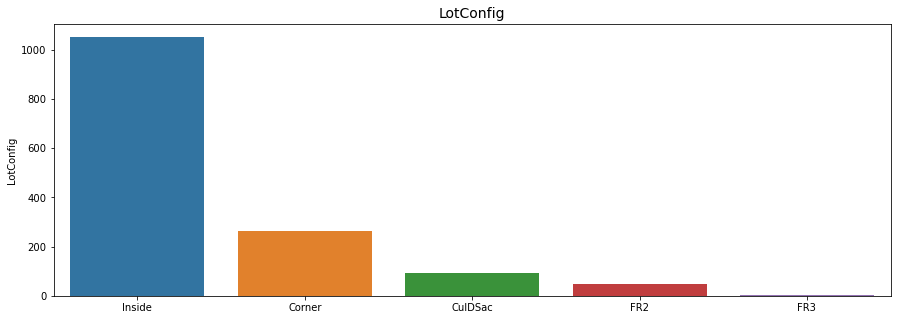

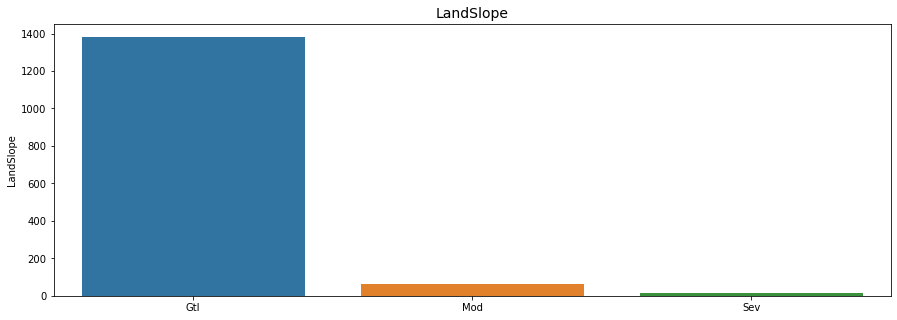

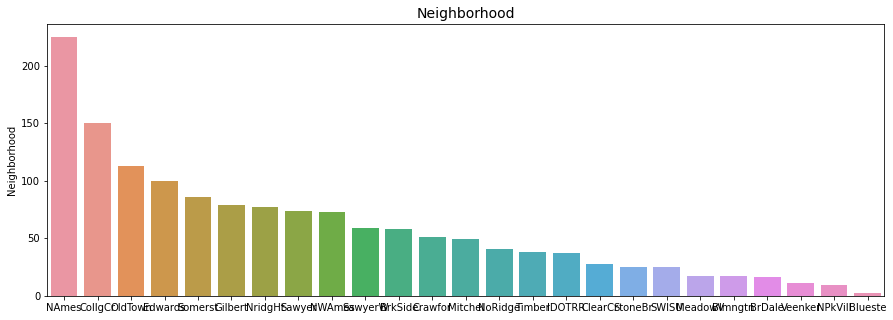

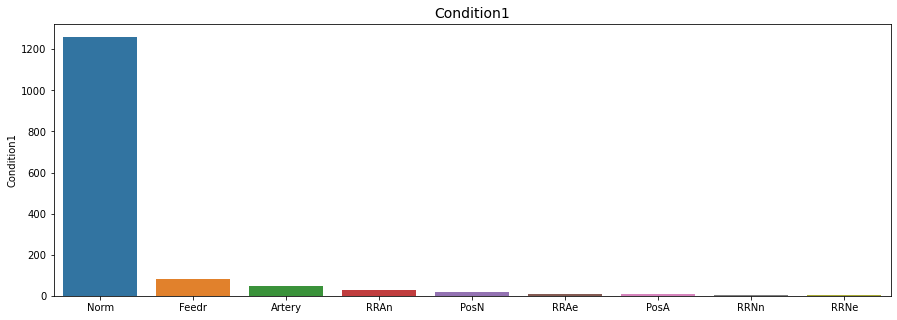

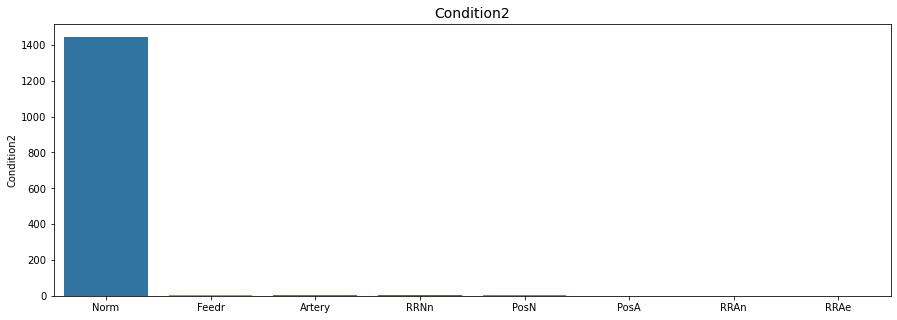

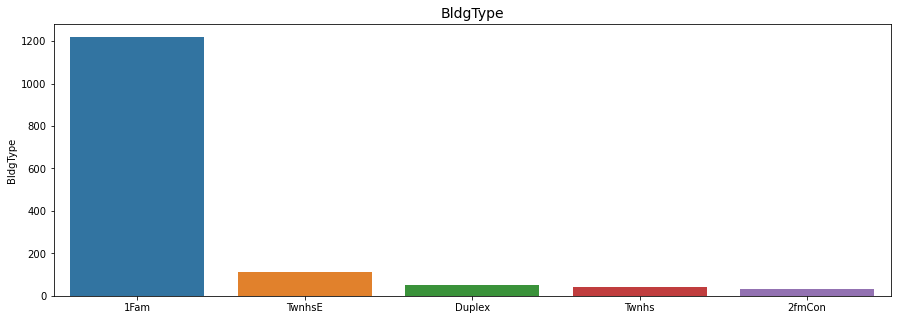

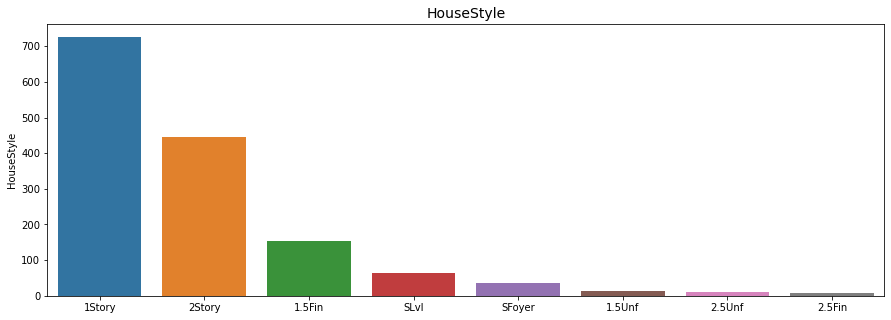

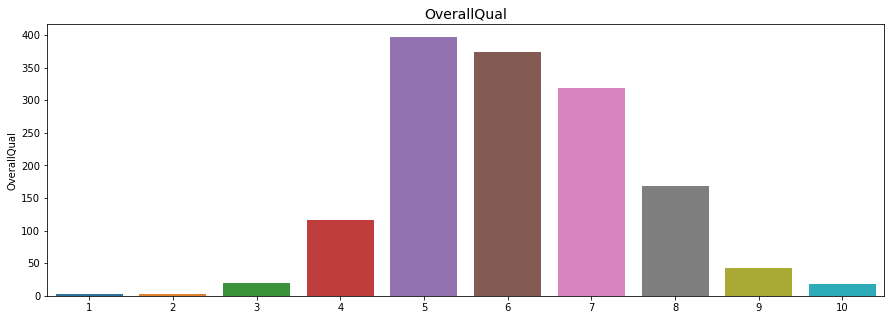

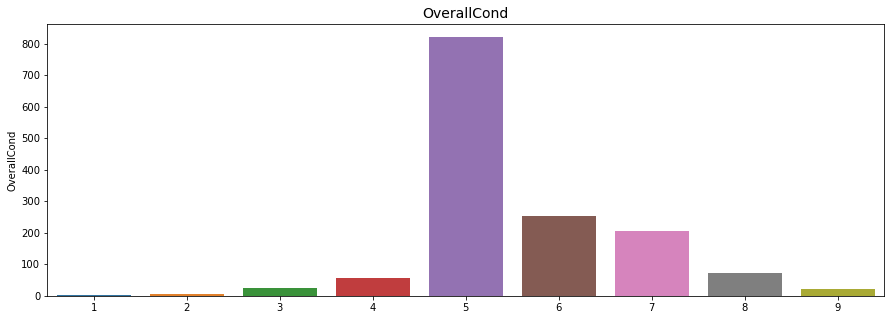

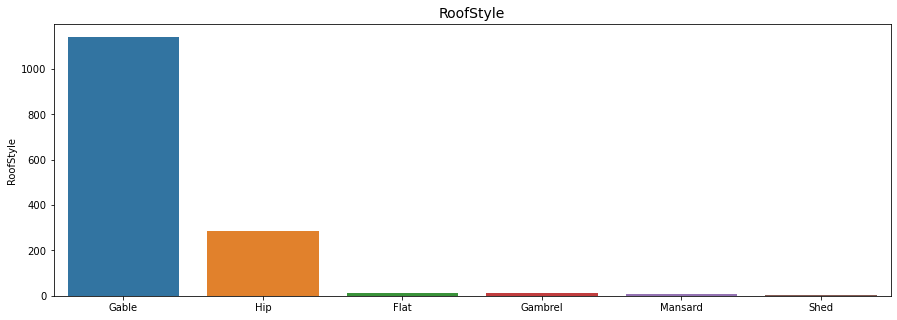

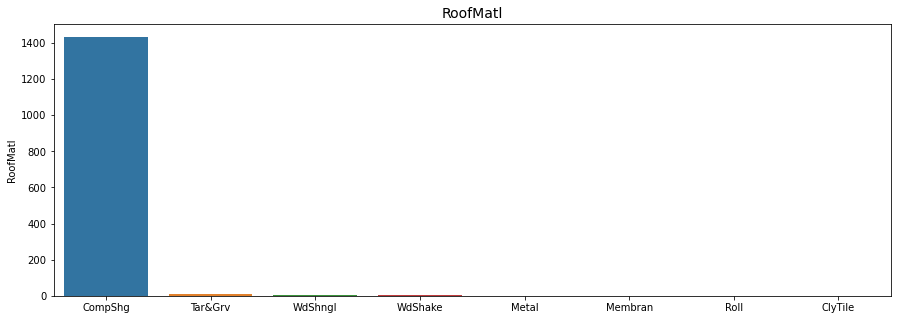

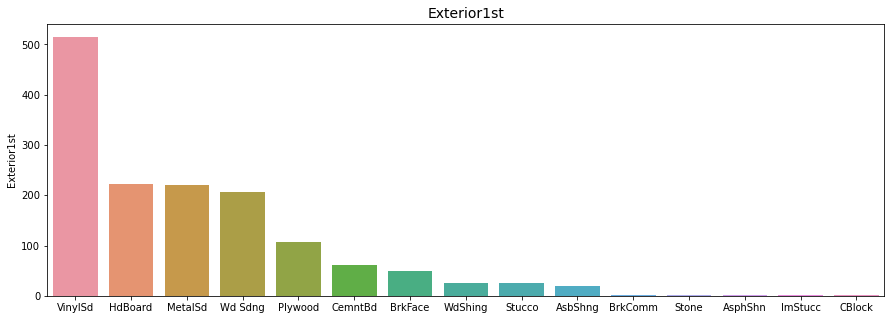

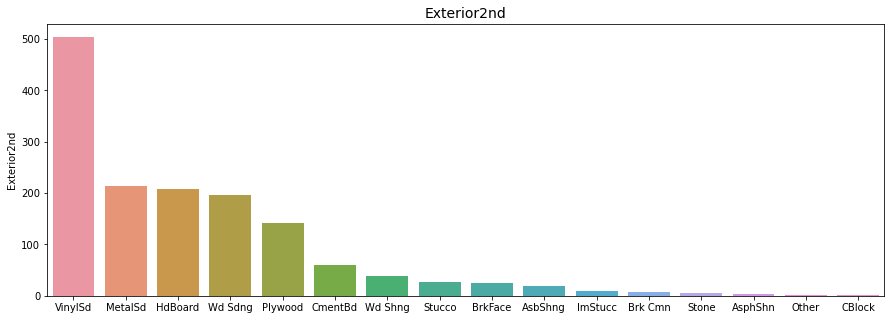

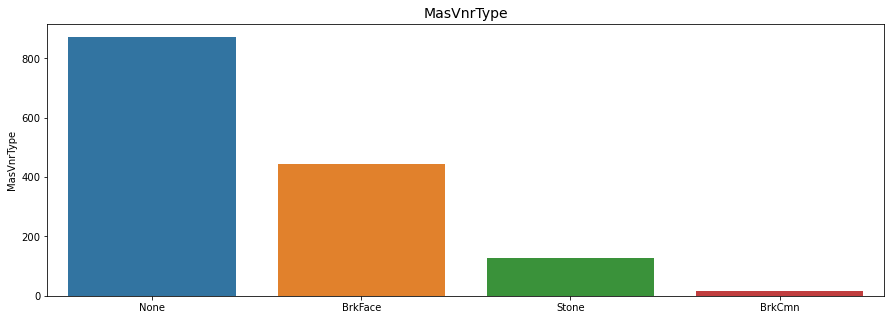

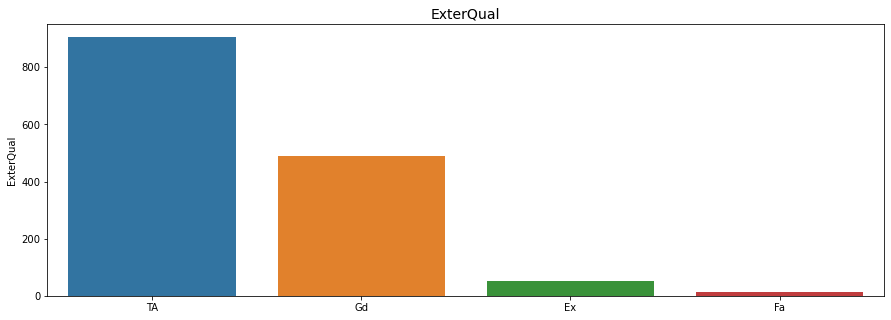

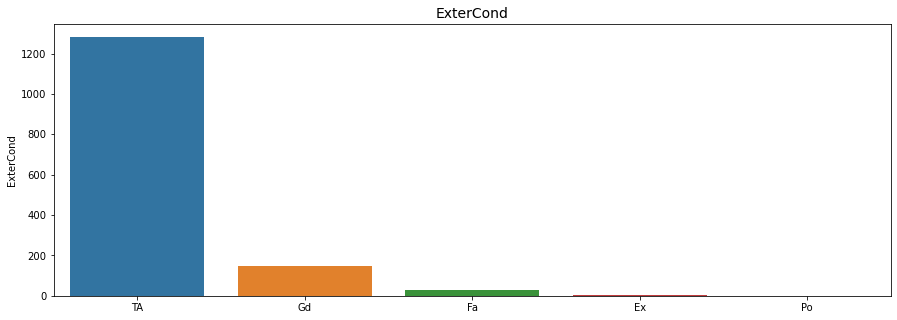

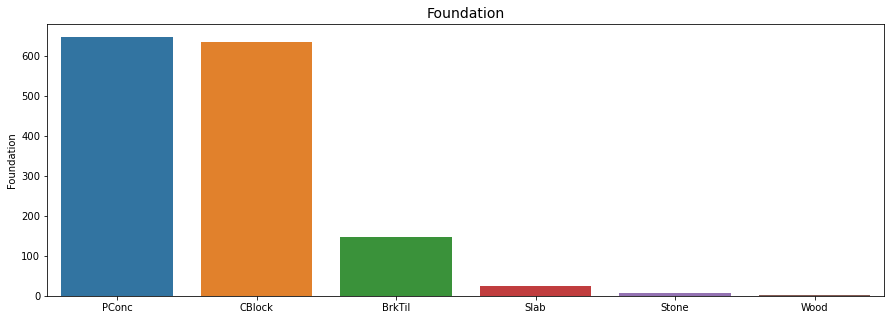

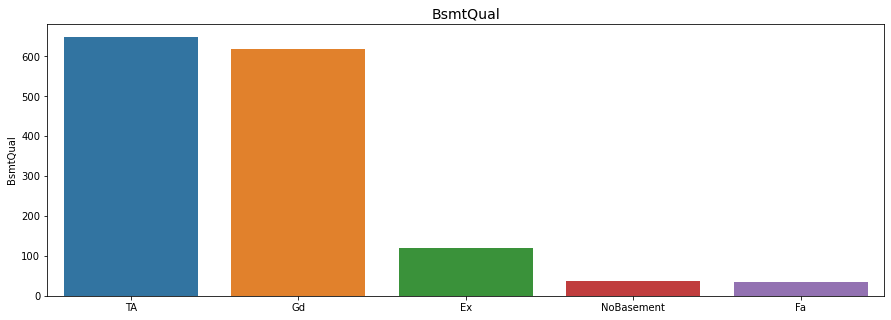

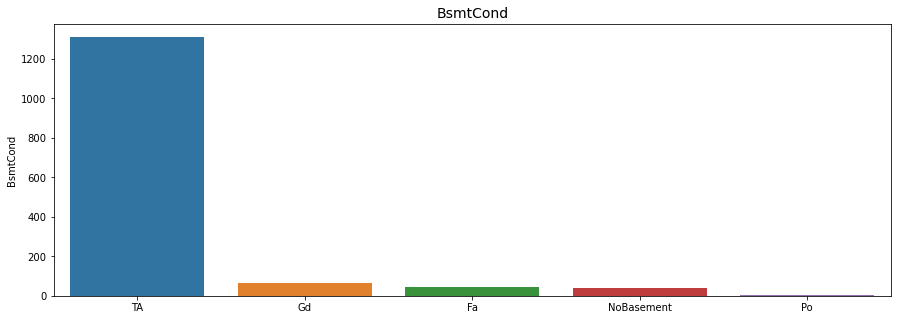

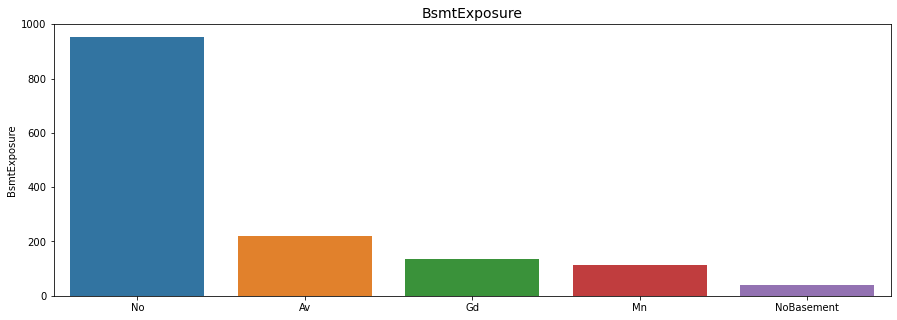

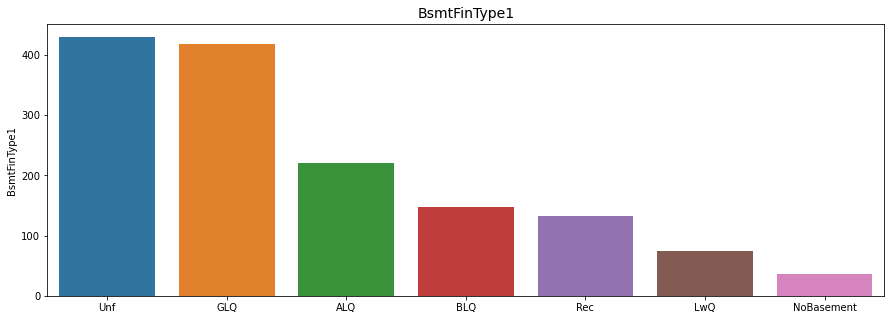

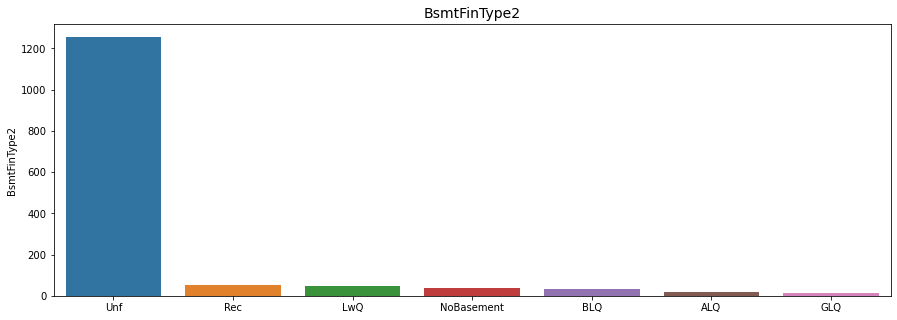

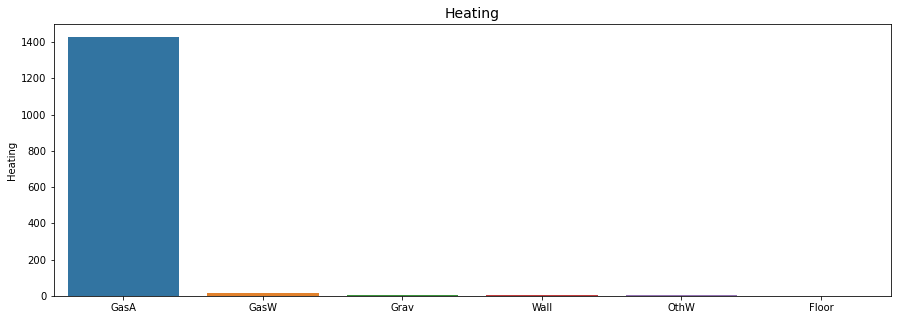

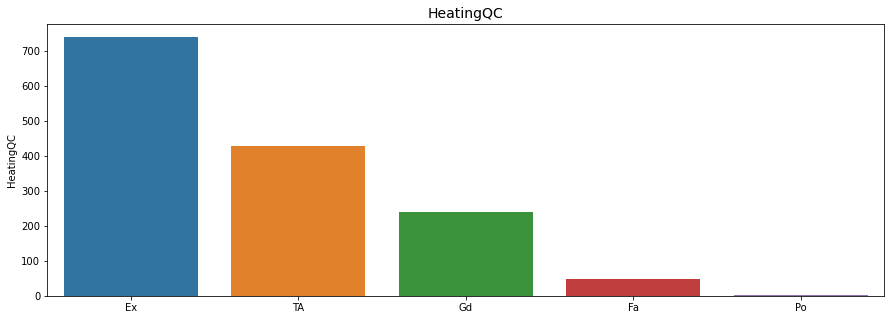

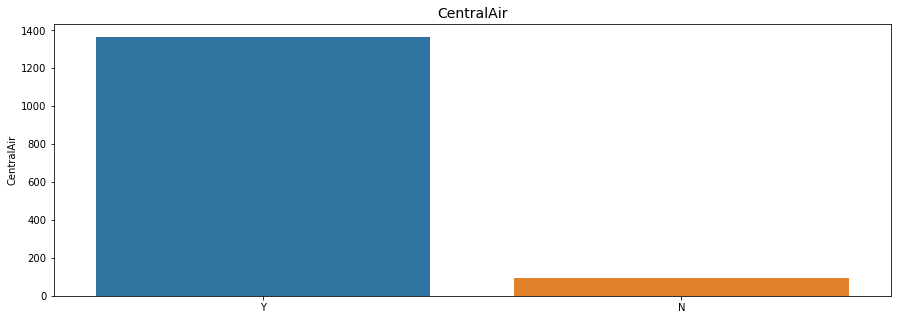

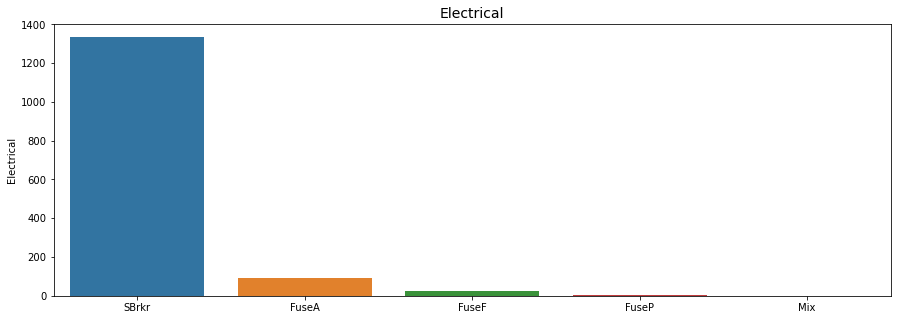

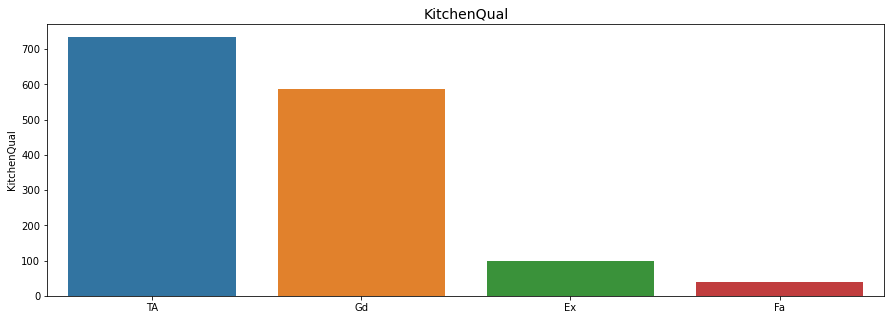

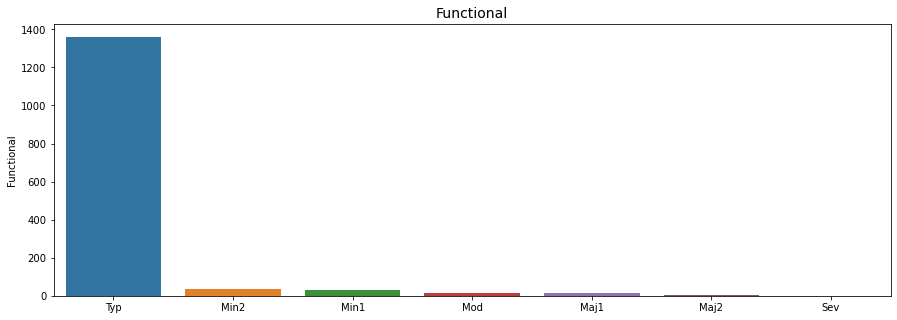

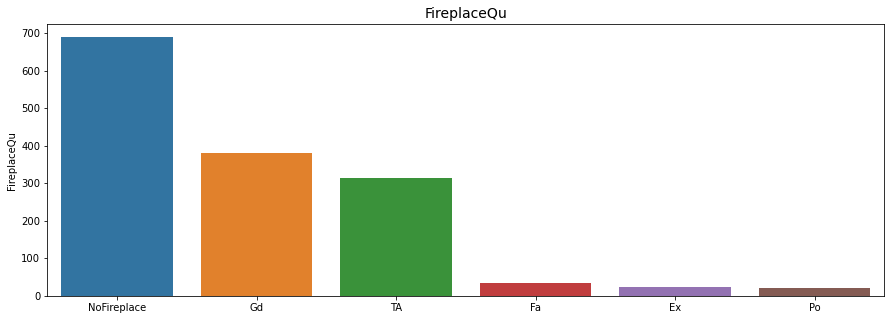

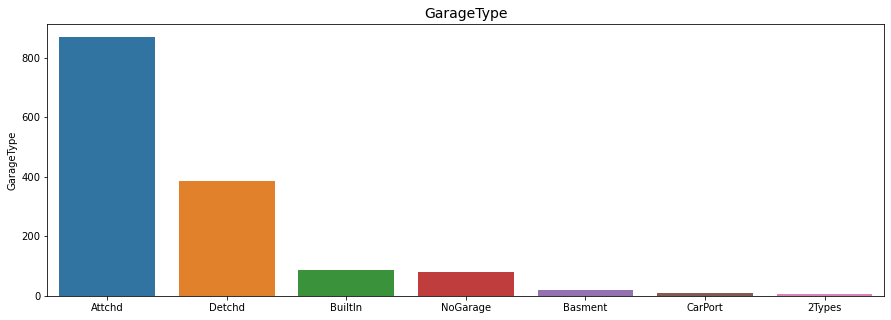

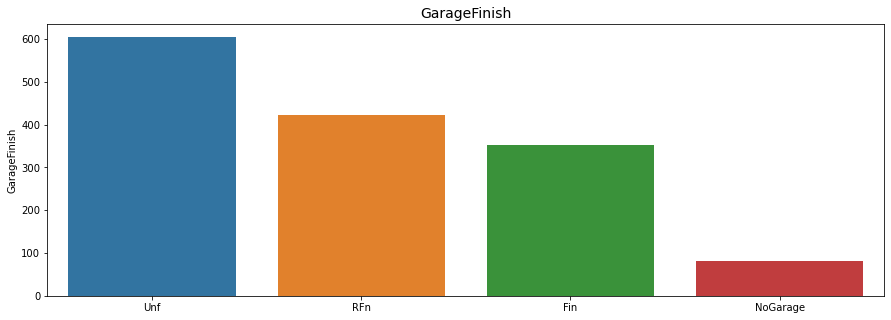

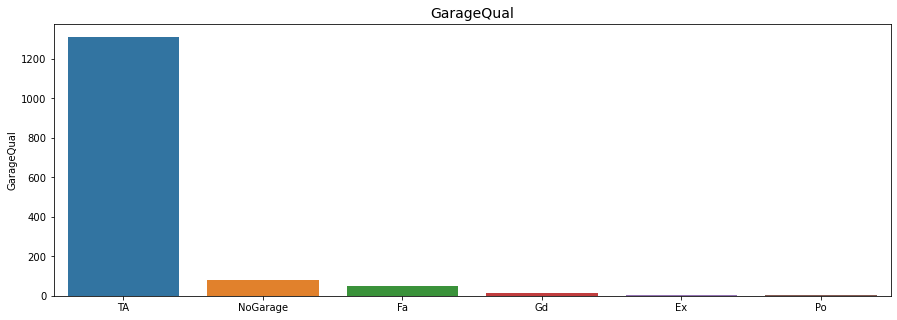

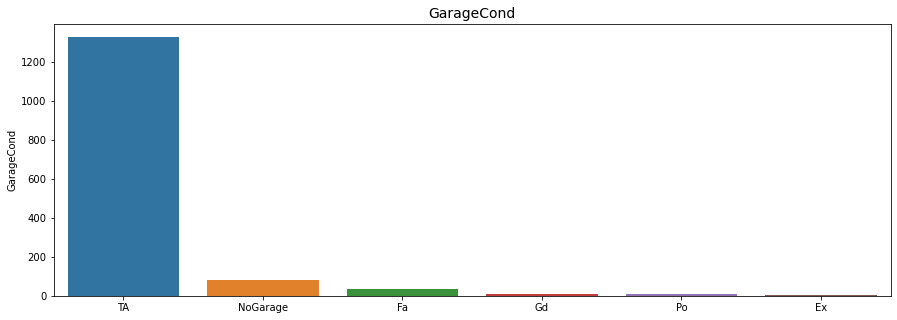

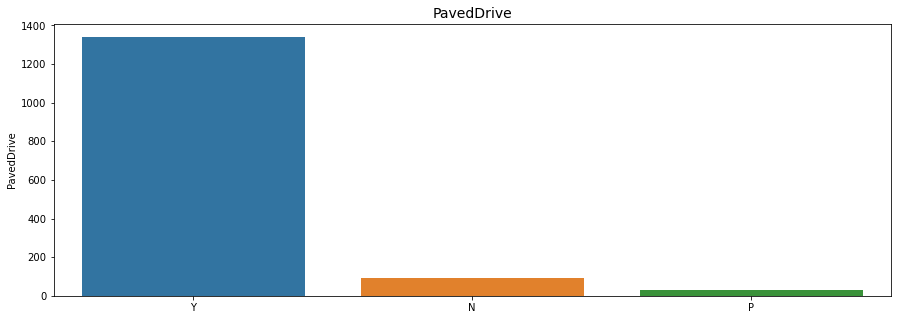

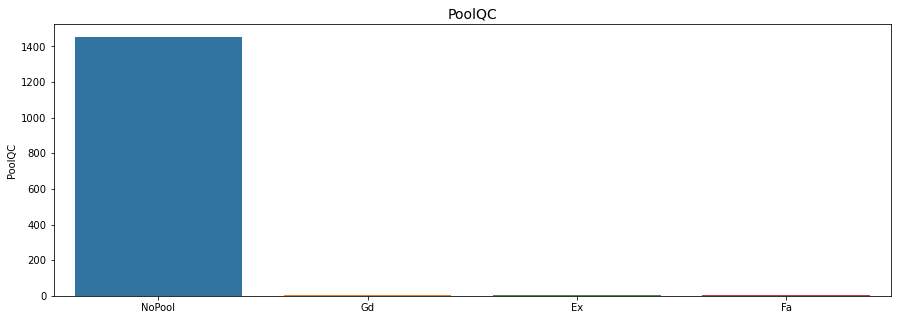

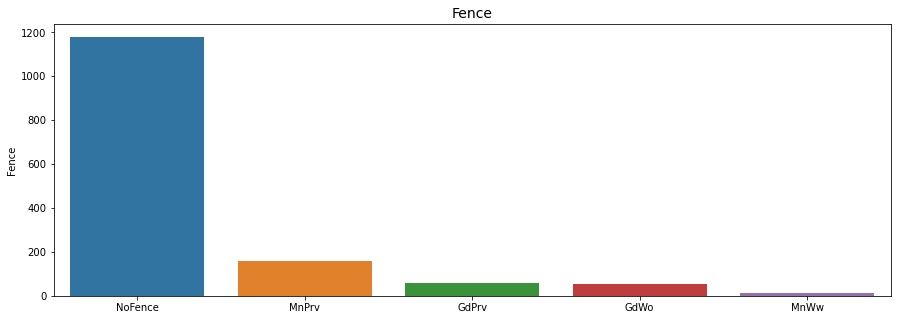

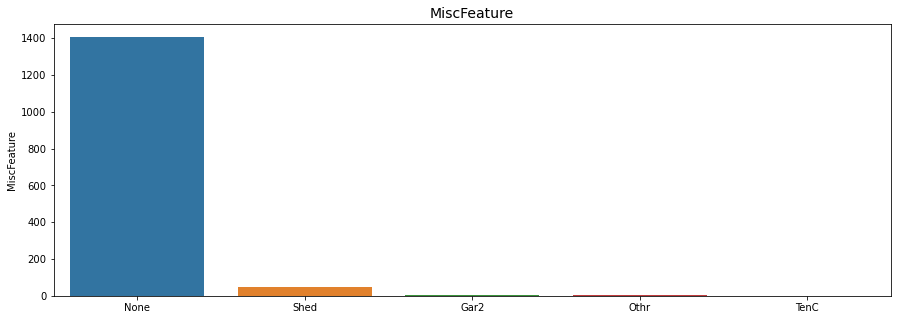

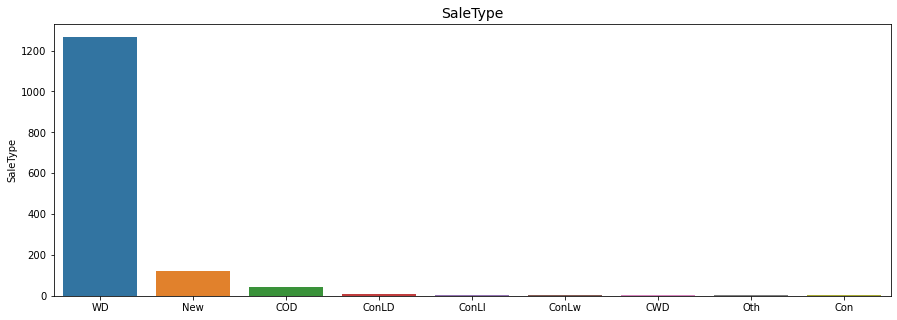

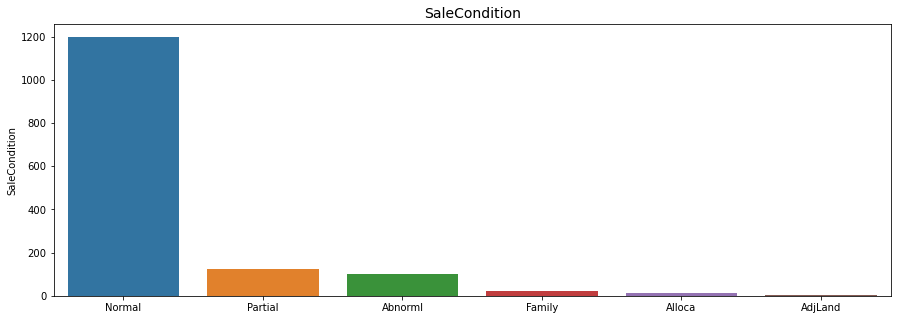

In [33]:
for col in categorical_features.columns:
    plt.figure(figsize=(15, 5))
    plt.title(col, fontdict={'fontsize': 14})
    sns.barplot(housing[col].value_counts().index, housing[col].value_counts())
    plt.show()

#### Plotting heatmap to check the correlation of all the features with each other

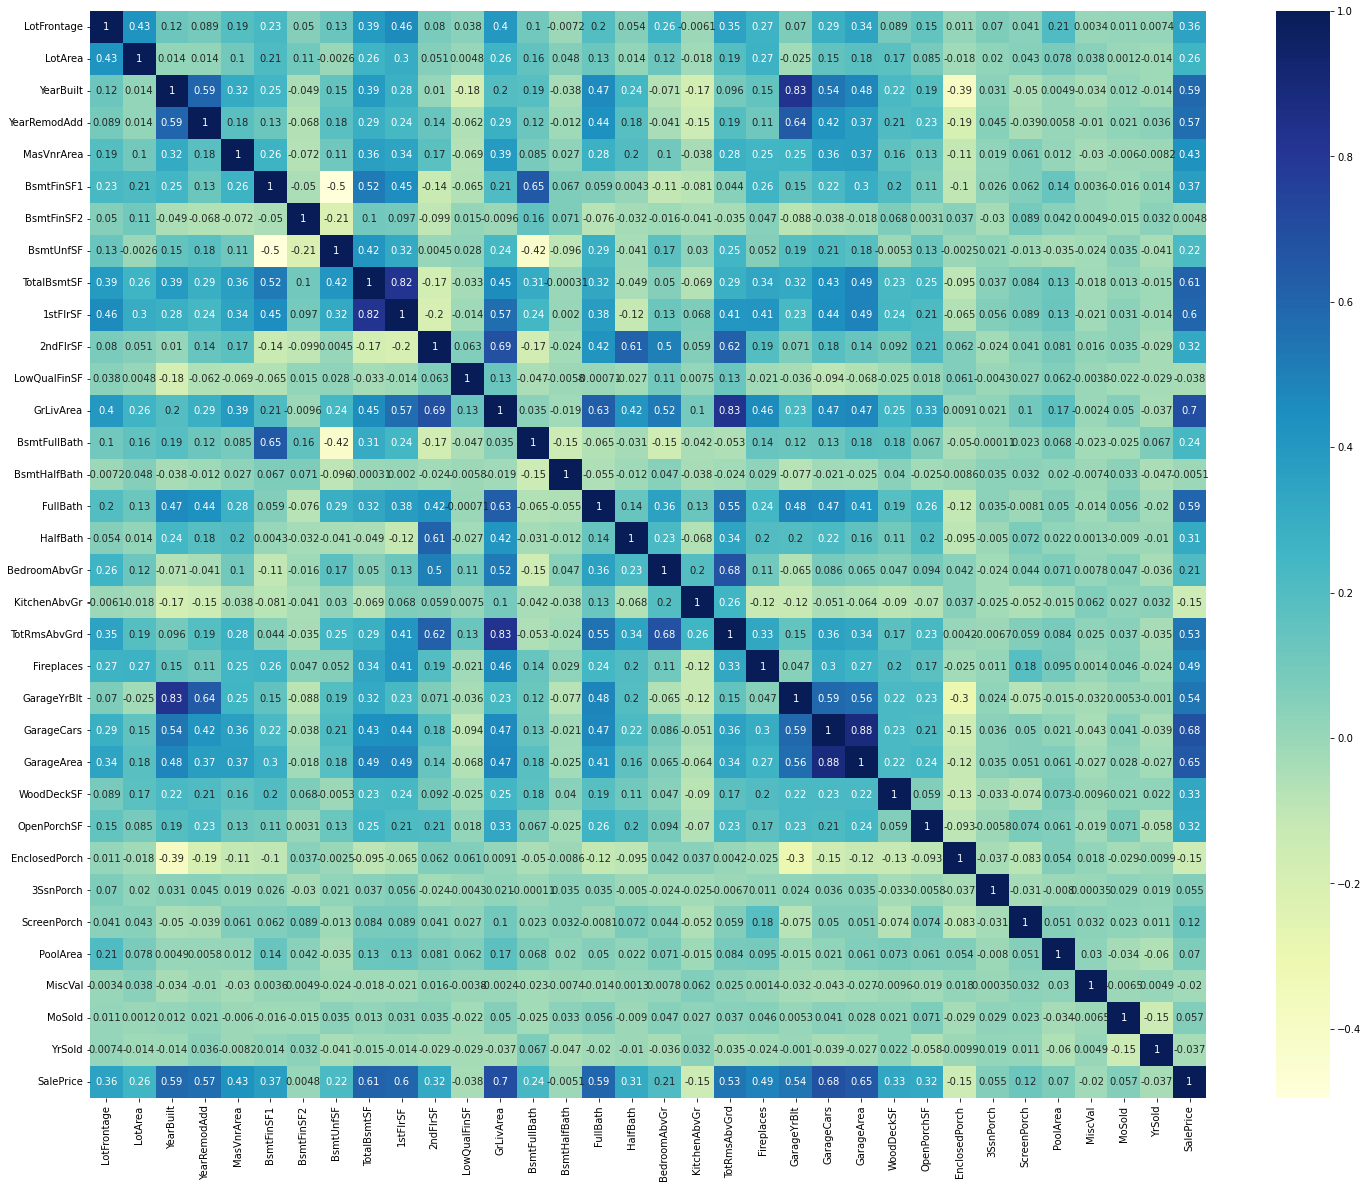

In [34]:
plt.figure(figsize = (25, 20))
sns.heatmap(housing.corr(), annot = True, cmap='YlGnBu')
plt.show()

The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- SalePrice is highly (positively) correlated with GrLivArea, GarageCars and GarageArea

- SalePrice is negatively correlated to EnclosedPorch and KitchenAbvGr. 

Correlation among independent variables:
- Many independent variables are highly correlated with each other: GarageCars and GarageArea,GrLivArea and TotRmsAbvGrd, BsmtFinSF1 and BsmtFinSF2, YearBlt and GarageYrBlt are highly positively correlated.

The high correlation of independent variables leads to multicollinearity in linear and logistic regression.

#### Imputing the data for LotFrontage and MasVnrArea

In [35]:
## Replacing missing values in the above meniioned two columns by their medians and means
housing['LotFrontage'].fillna(housing['LotFrontage'].median(), inplace=True)
housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(), inplace=True)

In [36]:
housing['GarageYrBlt'] = pd.to_numeric(housing['GarageYrBlt'], downcast='integer', errors='coerce')
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], downcast='integer', errors='coerce')

#### Creating a vriable that holds the age of the house and dropping the column used to derive the value

In [37]:
## Create new column for the age of the house
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

In [38]:
## Drop the two columns from which we created age of the house
housing.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [39]:
numeric_features_new = housing.select_dtypes(include=[np.number])
numeric_features_new.shape

(1460, 33)

#### Applying LabelEncoding and OneHotENcoder based on the categorical variable
- Label encoding is the process of assigning a unique integer label to each category in the categorical variable. It's commonly used when the categorical variable has an inherent order or ranking. 
- One-hot encoding is the process of creating binary columns for each category in the categorical variable. Each binary column (also known as a dummy variable) corresponds to one category, and it represents the presence (1) or absence (0) of that category in the original data point. It is used for all categorical variables where there is no order/ranking

In [40]:
le = preprocessing.LabelEncoder()

In [41]:
categorical_features[['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                     'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive',
                     'PoolQC','Fence']] = categorical_features[['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                     'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive',
                     'PoolQC','Fence']].apply(lambda col: le.fit_transform(col.astype(str)))

In [42]:
categorical_features_encoded = pd.get_dummies(categorical_features[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 
                                                                    'LandContour','Utilities', 'LotConfig', 'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                                                                    'Foundation', 'Heating', 'Electrical', 'Functional','GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']], drop_first=True)
categorical_features_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,...,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [43]:
categorical_features_encoded.shape

(1460, 169)

#### Outlier Treatment by using Winsorization: Winsorization involves capping or clipping extreme values at a specified percentile to reduce their impact without entirely removing them.

In [44]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in numeric_features_new.columns:
    numeric_features_new[col][numeric_features_new[col] <= numeric_features_new[col].quantile(0.05)] = numeric_features_new[col].quantile(0.05)
    numeric_features_new[col][numeric_features_new[col] >= numeric_features_new[col].quantile(0.95)] = numeric_features_new[col].quantile(0.95)

In [45]:
housing_new = pd.concat([numeric_features_new, categorical_features_encoded,categorical_features[['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                     'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive',
                     'PoolQC','Fence']]], axis=1)

In [46]:
housing_new.shape

(1460, 222)

In [47]:
housing_new.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.112568,9682.319212,1984.794521,92.616084,431.089041,32.931233,556.537671,1055.950616,1151.861370,337.731267,0.0,1498.922123,0.413699,0.056164,1.54863,0.374658,2.882192,1.0,6.500685,0.609589,1978.962329,1.763699,468.187877,88.889726,42.864829,19.154075,0.0,11.580822,0.0,0.0,6.321233,12.023097,35.984247,0.047260,0.002740,0.008219,0.098630,0.204795,0.041096,0.010959,0.039726,0.013699,0.035616,0.059589,0.043151,0.006849,0.020548,0.044521,0.010959,0.788356,...,0.914384,0.003425,0.021233,0.023288,0.010274,0.000685,0.931507,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479,0.963014,0.001370,0.033562,0.000685,0.002740,0.001370,0.006164,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616,0.062329,5.986986,4.575342,2.539726,3.733562,2.724658,3.691096,2.310274,3.150000,5.586986,1.538356,0.934932,2.339726,3.087671,1.876712,4.716438,4.763014,1.856164,2.991096,3.504795
std,16.509008,3469.967624,20.565620,140.426839,412.214952,100.569218,414.582219,346.901853,333.684061,415.255848,0.0,450.732225,0.492665,0.230318,0.49780,0.484200,0.660102,0.0,1.515965,0.634547,22.921760,0.739318,202.064708,109.391899,53.144211,50.385647,0.0,40.117506,0.0,0.0,2.550967,0.352744,28.829159,0.212268,0.052289,0.090317,0.298267,0.403690,0.198580,0.104145,0.195382,0.116277,0.185395,0.236805,0.203266,0.082505,0.141914,0.206319,0.104145,0.408614,...,0.279893,0.058440,0.144209,0.150867,0.100873,0.026171,0.252677,0.490887,0.113372,0.238075,0.078298,0.441521,0.228992,0.

In [48]:
## Separate out the target variable as y from the independent variables X
y = housing_new.pop("SalePrice")
X = housing_new
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003,2,548.0,0,61.0,0.00,0,0,0,0,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,7,4,2,4,2,4,3,2,6,0,1,2,3,2,5,5,2,3,4
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976,2,460.0,298,0.0,0.00,0,0,0,0,5,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,6,7,3,4,2,4,1,0,6,0,1,3,5,2,5,5,2,3,4
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001,2,608.0,0,42.0,0.00,0,0,0,0,9,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,7,4,2,4,2,4,2,2,6,0,1,2,5,2,5,5,2,3,4
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998,3,642.0,0,35.0,180.15,0,0,0,0,2,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,4,3,4,4,1,3,0,6,2,1,2,2,3,5,5,2,3,4
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000,3,836.0,192,84.0,0.00,0,0,0,0,11,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,8,4,2,4,2,4,0,2,6,0,1,2,5,2,5,5,2,3,4


In [49]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [50]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1022, 221)
(1022,)


In [51]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(438, 221)
(438,)


In [52]:
# ## Create a list of numerical columns to be scaled

numeric_cols = list(numeric_features_new.drop(['SalePrice'],axis=1).columns)
numeric_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [53]:
def metrics(y_train, y_pred_train, y_test, y_pred_test):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("r2 train : ",r2_train_lr)
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    print("r2 test : ",r2_test_lr)
    metric.append(r2_test_lr)
    
    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("rss train : ",rss1_lr)
    metric.append(rss1_lr)
    
    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("rss test : ",rss2_lr)
    metric.append(rss2_lr)
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("mse train : ",mse_train_lr)
    metric.append(mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("mse test : ",mse_test_lr)
    metric.append(mse_test_lr)
    
    rmse_train_lr = mse_train_lr**0.5
    print("rmse train : ",rmse_train_lr)
    metric.append(rmse_train_lr)
    
    rmse_test_lr = mse_test_lr**0.5
    print("rmse test : ",rmse_test_lr)
    metric.append(rmse_test_lr)
    
    return metric

In [54]:
## Create a scaling instance
scaler = StandardScaler()
## Scale the numerical columns 
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Model Building and Evaluation

In [55]:
# Running Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-17243047476.142487
[ 9.88854494e-03  1.40535125e-02  2.24359329e-02  2.56757405e-03
 -4.59818274e-04 -8.46929121e-03 -1.81117712e-02  6.29552488e-02
  8.56987287e-04  3.18408981e-02 -4.79548760e+11  9.13973537e-02
  1.59426782e-02 -2.56923875e-03  1.75740136e-02  1.29742710e-02
  1.98639516e-03  6.87526487e+10 -3.28810047e-03  1.53524302e-02
 -1.26154756e-02  1.31303612e-02  3.52236290e-02  1.07493366e-02
  4.58333668e-03  5.24081726e-03  5.25942411e+10  9.07351201e-03
 -9.55699733e+10 -9.91383811e+10  2.02923006e-03 -7.16783365e-02
 -2.32762981e-02 -9.67182852e-02 -6.09332984e-02  2.80816764e-02
  1.16420541e-02  6.80127453e-02 -3.06562151e-02 -1.28258881e-01
 -2.43074337e-02 -8.35766185e+10 -1.17586795e-02 -7.92082702e-02
 -8.78052791e-02  5.17189309e-02  1.06136483e-01  1.21754631e-01
  7.94071613e-02  2.38398456e-02 -1.86191859e-02 -2.43794057e-02
  2.56235453e-02  2.06866650e-02  5.91687867e-02  7.26562493e-04
 -2.15032895e-02  8.95291781e-03 -1.93773295e-02 -2.44980856e-01
  2.0

In [57]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

lr_metrics = metrics(y_train, y_pred_train, y_test, y_pred_test)

r2 train :  0.9476585963915689
r2 test :  -8.839698368474405e+18
rss train :  6.632214286394816
rss test :  4.83591490535917e+20
mse train :  0.006489446464182794
mse test :  1.1040901610409065e+18
rmse train :  0.08055710064409465
rmse test :  1050756946.7012371


#### It can be seen from above that the linear regression model does not perform well on the data set as the R2 of training data is0.947 but that of the test data is in negative which is a clear indication of Over-fitting model which can be taken care oof using regularization

In [58]:
# Running RFE with the output number of the variable equal to 20
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
rfe = RFE(lm1, n_features_to_select=20)                           
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('LotFrontage', False, 135),
 ('LotArea', False, 97),
 ('YearRemodAdd', False, 89),
 ('MasVnrArea', False, 180),
 ('BsmtFinSF1', False, 201),
 ('BsmtFinSF2', False, 148),
 ('BsmtUnfSF', False, 73),
 ('TotalBsmtSF', False, 49),
 ('1stFlrSF', False, 189),
 ('2ndFlrSF', False, 78),
 ('LowQualFinSF', False, 191),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 112),
 ('BsmtHalfBath', False, 172),
 ('FullBath', False, 116),
 ('HalfBath', False, 125),
 ('BedroomAbvGr', False, 183),
 ('KitchenAbvGr', False, 196),
 ('TotRmsAbvGrd', False, 178),
 ('Fireplaces', False, 90),
 ('GarageYrBlt', False, 137),
 ('GarageCars', False, 103),
 ('GarageArea', False, 44),
 ('WoodDeckSF', False, 141),
 ('OpenPorchSF', False, 154),
 ('EnclosedPorch', False, 153),
 ('3SsnPorch', False, 194),
 ('ScreenPorch', False, 140),
 ('PoolArea', False, 192),
 ('MiscVal', False, 193),
 ('MoSold', False, 181),
 ('Age', True, 1),
 ('MSSubClass_30', False, 126),
 ('MSSubClass_40', False, 65),
 ('MSSubClass_45', False, 146)

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'Age', 'MSSubClass_90', 'MSSubClass_160',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_PosA',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_Stucco', 'Foundation_Slab',
       'Foundation_Wood', 'Functional_Maj2', 'Functional_Sev', 'SaleType_Con'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='object', length=201)

In [62]:
# Creating X_test dataframe with RFE selected varaibles
X_train_rfe = X_train[col]

In [63]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [64]:
lm1 = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [65]:
# let's see the summary of our linear model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     223.3
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:12:17   Log-Likelihood:                 484.08
No. Observations:                1022   AIC:                            -926.2
Df Residuals:                    1001   BIC:                            -822.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1920      0.158     70.952      0.000      10.882      11.502
GrLivArea                0.1932      0.005     37.189      0.000       0.183       0.203
Age                     -0.1875      0.005    -35.544      0.000      -0.198      -0.177
MSSubClass_90           -0.2317      0.026     -8.914      0.000      -0.283      -0.181
MSSubClass_160          -0.2242      0.024     -9.343      0.000      -0.271      -0.177
Neighborhood_Crawfor     0.2427      0.026      9.202      0.000       0.191       0.294
Neighborhood_MeadowV    -0.2763      0.045     -6.092      0.000      -0.365      -0.187
Condition2_PosA          0.5974      0.153      3.896      0.000       0.296       0.898
RoofMatl_CompShg         0.8382      0.158      5.315      0.000       0.529       1.148
RoofMatl_Membran         1.3737      0.219      6.260      0.000       0.943       1.804
RoofMatl_Roll            0.8314      0.221      3.759      0.000       0.397       1.265
RoofMatl_Tar&Grv         0.9917      0.170      5.845      0.000       0.659       1.325
RoofMatl_WdShake         0.8648      0.175      4.943      0.000       0.522       1.208
RoofMatl_WdShngl         1.0356      0.180      5.744      0.000       0.682       1.389
Exterior1st_BrkComm     -0.4560      0.152     -2.993      0.003      -0.755      -0.157
Exterior1st_Stucco       0.1451      0.039      3.704      0.000       0.068       0.222
Foundation_Slab         -0.2216      0.041     -5.425      0.000      -0.302      -0.141
Foundation_Wood         -0.1498      0.153     -0.981      0.327      -0.450       0.150
Functional_Maj2         -0.2386      0.108     -2.212      0.027      -0.450      -0.027
Functional_Sev          -0.7598      0.165     -4.613      0.000      -1.083      -0.437
SaleType_Con             0.2113      0.108      1.959      0.050      -0.000       0.423
==============================================================================
Omnibus:                       31.615   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.038
Skew:                          -0.146   Prob(JB):                     2.77e-15
Kurtosis:                       4.220   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_test_rfe=X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)

In [67]:
y_pred_train = lm1.predict(X_train_rfe)
y_pred_test = lm1.predict(X_test_rfe)

lr_rfe_metrics = metrics(y_train, y_pred_train, y_test, y_pred_test)


r2 train :  0.8168735825065824
r2 test :  0.7802384908725033
rss train :  23.204070937839944
rss test :  12.022445940056445
mse train :  0.022704570389275876
mse test :  0.027448506712457636
rmse train :  0.15068035833935317
rmse test :  0.16567590866646134


#### Even after using RFE we see that the model is not performing well. The R2-squared of the train and test data is not pretty good.

### Ridge Regression

In [68]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
ridge_alpha = ridge_cv.best_params_['alpha']

In [70]:
ridge_cv.cv_results_

{'mean_fit_time': array([0.00777588, 0.01119976, 0.00992064, 0.00509443, 0.00849667,
        0.0045476 , 0.00443511, 0.000278  , 0.01103477, 0.00878367,
        0.00579638, 0.00804234, 0.00582476, 0.00667691, 0.00595717,
        0.01007299, 0.01209283, 0.00796571, 0.01229658, 0.01151485,
        0.0104178 , 0.00642567, 0.00720735, 0.00801482, 0.00638609,
        0.00696898, 0.00980549, 0.0084229 ]),
 'std_fit_time': array([0.00400576, 0.00651456, 0.00810267, 0.00584911, 0.00356987,
        0.00376235, 0.00654855, 0.00055599, 0.00658831, 0.00509037,
        0.00293937, 0.00178865, 0.00514971, 0.00644613, 0.00641281,
        0.00822894, 0.00536101, 0.0052131 , 0.0063938 , 0.00415441,
        0.0046605 , 0.00078204, 0.00039882, 0.00114847, 0.0006621 ,
        0.00066587, 0.00248127, 0.00133553]),
 'mean_score_time': array([0.00221066, 0.00090475, 0.00221782, 0.00648994, 0.00299835,
        0.00824952, 0.00326366, 0.00564318, 0.00100765, 0.00198293,
        0.00179434, 0.00321021, 0.003850

In [71]:
# Create a ridge regreesion instance with optimum value of alpha
ridge = Ridge(alpha=ridge_alpha)

In [72]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [73]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 9.74815900e-03,  1.62255709e-02,  2.47885868e-02, -1.52477773e-03,
        2.16672368e-02, -3.71479274e-04, -2.64778327e-04,  4.54956758e-02,
        1.24795249e-02,  3.47949873e-02,  0.00000000e+00,  8.02142794e-02,
        1.46685852e-02, -1.68217891e-03,  1.70437689e-02,  1.61312536e-02,
        2.78672025e-03,  0.00000000e+00, -2.65964539e-03,  1.92581144e-02,
       -4.22782424e-03,  1.55508188e-02,  2.61332330e-02,  9.48305029e-03,
        4.07364830e-03,  4.24741506e-03,  0.00000000e+00,  8.15700080e-03,
        0.00000000e+00,  0.00000000e+00,  3.47866734e-03, -5.57939854e-02,
       -9.83279346e-03, -7.31580061e-03, -3.29178648e-03,  8.67235765e-03,
       -2.52241201e-03,  4.43447395e-02,  4.21914832e-03, -6.49781356e-03,
       -3.41787745e-04, -2.58347842e-02,  6.96341379e-03, -4.39147926e-02,
       -1.93720344e-02, -1.55464568e-02,  2.91870860e-02,  1.82306531e-02,
        1.18257153e-02, -3.99064072e-02,  4.55289294e-04, -9.84498103e-03,
        1.61545144e-02,  

In [74]:
## Make predictions and getting the metrics to assess the model
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

ridge_metrics = metrics(y_train, y_train_pred, y_test, y_pred)
ridge_cv_results= pd.DataFrame(ridge_cv.cv_results_)

r2 train :  0.9330459217249104
r2 test :  0.9174265945529732
rss train :  8.483796074527099
rss test :  4.51732565459085
mse train :  0.008301170327325929
mse test :  0.01031352889175993
rmse train :  0.09111075857068653
rmse test :  0.10155554584442905


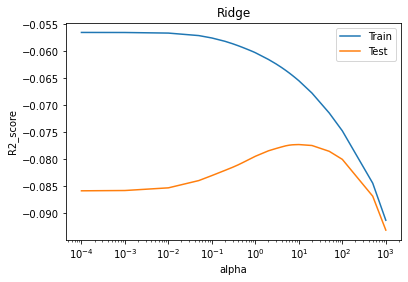

In [75]:
## Plotting R2 score vs alpha values for Ridge regression
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], label='Train')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.title('Ridge')
plt.xscale('log')
plt.legend()
plt.show()

### Lasso Regression

In [76]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
## View the optimal value of alpha
lasso_alpha = lasso_cv.best_params_['alpha']
lasso_alpha

0.001

In [78]:
## View the results of cross validation search
lasso_cv.cv_results_

{'mean_fit_time': array([0.03004551, 0.01354051, 0.00878057, 0.00812888, 0.00783858,
        0.00730872, 0.00821238, 0.00969529, 0.0080452 , 0.00884504,
        0.01310587, 0.01577597, 0.00625291, 0.00837569, 0.00829096,
        0.01071234, 0.00939369, 0.00719814, 0.00580425, 0.00611119,
        0.0110991 , 0.01160097, 0.00312724, 0.01143303, 0.0075285 ,
        0.00630641, 0.00928717, 0.00621977]),
 'std_fit_time': array([0.00633717, 0.00069924, 0.0009117 , 0.00060215, 0.00079018,
        0.000754  , 0.00506161, 0.00437417, 0.00339672, 0.00287379,
        0.00329073, 0.00306807, 0.00765843, 0.00876009, 0.0071724 ,
        0.00685849, 0.00767701, 0.00701514, 0.00039891, 0.00066429,
        0.00367988, 0.00487895, 0.00625448, 0.006083  , 0.00111891,
        0.00040133, 0.00603744, 0.00482901]),
 'mean_score_time': array([0.00319538, 0.00340176, 0.00277324, 0.00290537, 0.00228186,
        0.00259013, 0.0027967 , 0.00360241, 0.00340304, 0.00379314,
        0.00300064, 0.00626497, 0.003323

In [79]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=lasso_alpha)

In [80]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [81]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 0.00782457,  0.01556567,  0.02649338,  0.        ,  0.02333776,
        0.        , -0.        ,  0.05197745,  0.        ,  0.01635488,
        0.        ,  0.10115936,  0.01345611, -0.00062288,  0.00950292,
        0.01259194, -0.        ,  0.        , -0.        ,  0.0219743 ,
       -0.        ,  0.01553177,  0.02434347,  0.00903667,  0.00359763,
        0.00337689,  0.        ,  0.00827064,  0.        ,  0.        ,
        0.00340517, -0.05448378, -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.01764347,  0.        ,  0.        ,
       -0.        , -0.01197985,  0.        , -0.01221624, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.05845744,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00152994,  0.        ,  0.        , -0.01003712, -0.        ,
        0.0194342 , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.05525819,  0.        , -0.00369316,  0.07

In [82]:
## Make predictions and get the metrics
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

lasso_metrics = metrics(y_train, y_train_pred, y_test, y_pred)

lasso_cv_results= pd.DataFrame(lasso_cv.cv_results_)

r2 train :  0.9215674034306824
r2 test :  0.9153241388559734
rss train :  9.938246810834066
rss test :  4.632344249334293
mse train :  0.009724311947978539
mse test :  0.010576128423137654
rmse train :  0.09861192599264319
rmse test :  0.10284030544070576


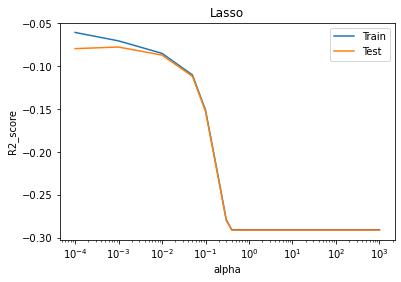

In [83]:
## Plotting R2 score vs alpha values for Lasso Regression
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.title('Lasso')
plt.xscale('log')
plt.legend()
plt.show()

In [84]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Linear Regression' : lr_metrics,
            'Linear With RFE Regression' : lr_rfe_metrics,
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression','Linear With RFE Regression','Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Linear Regression,Linear With RFE Regression,Ridge Regression,Lasso Regression
Metric,,,,
R2 Score (Train),9.476586e-01,0.816874,0.933046,0.921567
R2 Score (Test),-8.839698e+18,0.780238,0.917427,0.915324
RSS (Train),6.632214e+00,23.204071,8.483796,9.938247
RSS (Test),4.835915e+20,12.022446,4.517326,4.632344
MSE (Train),6.489446e-03,0.022705,0.008301,0.009724
MSE (Test),1.104090e+18,0.027449,0.010314,0.010576
RMSE (Train),8.055710e-02,0.150680,0.091111,0.098612
RMSE (Test),1.050757e+09,0.165676,0.101556,0.102840


In [85]:
## Creating an empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [86]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [87]:
betas

,Ridge,Lasso
LotFrontage,0.009748,0.007825
LotArea,0.016226,0.015566
YearRemodAdd,0.024789,0.026493
MasVnrArea,-0.001525,0.000000
BsmtFinSF1,0.021667,0.023338
...,...,...
GarageQual,0.002304,0.002933
GarageCond,-0.001109,0.000000
PavedDrive,0.019018,0.013813
PoolQC,-0.000978,0.000000


In [88]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage             0.007825
LotArea                 0.015566
YearRemodAdd            0.026493
BsmtFinSF1              0.023338
TotalBsmtSF             0.051977
2ndFlrSF                0.016355
GrLivArea               0.101159
BsmtFullBath            0.013456
BsmtHalfBath           -0.000623
FullBath                0.009503
HalfBath                0.012592
Fireplaces              0.021974
GarageCars              0.015532
GarageArea              0.024343
WoodDeckSF              0.009037
OpenPorchSF             0.003598
EnclosedPorch           0.003377
ScreenPorch             0.008271
MoSold                  0.003405
Age                    -0.054484
MSSubClass_70           0.017643
MSSubClass_90          -0.011980
MSSubClass_160         -0.012216
MSZoning_RM            -0.058457
LotShape_Reg           -0.001530
LandContour_Lvl        -0.010037
LotConfig_CulDSac       0.019434
Neighborhood_BrkSide    0.055258
Neighborhood_CollgCr   -0.003693
Neighborhood_Crawfor    0.075944
Neighborho

In [89]:
betas.loc[betas['Lasso']!=0, 'Lasso'].shape

(70,)

#### Lasso regression Model has 66 variables

In [90]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.080214
Neighborhood_Crawfor    0.071538
Exterior1st_BrkFace     0.057555
Functional_Typ          0.055688
Neighborhood_BrkSide    0.054548
SaleCondition_Normal    0.046883
TotalBsmtSF             0.045496
MSSubClass_70           0.044345
Condition1_Norm         0.043708
Condition2_PosA         0.041855
Name: Ridge, dtype: float64

In [91]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.083519
Neighborhood_Crawfor    1.074159
Exterior1st_BrkFace     1.059243
Functional_Typ          1.057268
Neighborhood_BrkSide    1.056063
SaleCondition_Normal    1.047999
TotalBsmtSF             1.046546
MSSubClass_70           1.045343
Condition1_Norm         1.044677
Condition2_PosA         1.042744
Name: Ridge, dtype: float64

In [92]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.106453
Neighborhood_Crawfor    1.078902
Exterior1st_BrkFace     1.061517
Functional_Typ          1.059409
Neighborhood_BrkSide    1.056813
TotalBsmtSF             1.053352
Condition1_Norm         1.040702
OverallCond             1.037323
SaleCondition_Normal    1.034514
OverallQual             1.031013
Name: Lasso, dtype: float64

### Conclusions
- The model R2-squared for Ridge and Lasso is almost the same for train and test data with Ridge performing slightly better than Lasso.
- Ridge regression does not perform feature selection and hence we have the ridge regression model with all the 221 independent variables
- Lasso Regression performs feature selection and only 70 variables out of 221 were selected here. 
- Hence, preferable would be the Lasso Regression Model.
- The top 5 features affecting the SalePrice for Ridge and Lasso Regression model are : GrLivArea, Neighborhood_Crawfor, Exterior1st_BrkFace, Functional_Typ and  Neighborhood_BrkSide.